# ENVIRONMENT SETUP

In [5]:
!pip install missingno fuzzywuzzy fancyimpute

In [616]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from fuzzywuzzy import process
from fancyimpute import KNN
from fancyimpute import IterativeImputer
import statsmodels.api as sm    

pd.set_option('display.max_columns', 100)
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [7]:
filename = "./Data Files and Associated Dictionary Files/Medical Data/medical_raw_data.csv"

# Part 0: Data Exploration

In [8]:
df = pd.read_csv(filename)
# df.drop("Unnamed: 0", 1)

In [9]:
df.dtypes
print(df.shape, end="\n\n")
print(df.columns, end="\n\n")
print(df.index, end="\n\n")
df.info()

Unnamed: 0              int64
CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
Timezone               object
Job                    object
Children              float64
Age                   float64
Education              object
Employment             object
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
VitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight            float64
Arthritis 

(10000, 53)

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

RangeIndex(start=0, stop=10000, step=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  ----- 

In [10]:
df['Population'].describe()
df.describe()

count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64

Unnamed: 0    CaseOrder           Zip           Lat           Lng  \
count  10000.00000  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000   5000.50000  50159.323900     38.751099    -91.243080   
std     2886.89568   2886.89568  27469.588208      5.403085     15.205998   
min        1.00000      1.00000    610.000000     17.967190   -174.209690   
25%     2500.75000   2500.75000  27592.000000     35.255120    -97.352982   
50%     5000.50000   5000.50000  50207.000000     39.419355    -88.397230   
75%     7500.25000   7500.25000  72411.750000     42.044175    -80.438050   
max    10000.00000  10000.00000  99929.000000     70.560990    -65.290170   

          Population     Children          Age         Income   VitD_levels  \
count   10000.000000  7412.000000  7586.000000    7536.000000  10000.000000   
mean     9965.253800     2.098219    53.295676   40484.438268     19.412675   
std     14824.758614     2.155427    20.659182   28664.861050      6.723277   
min         0.000000     0.000000    18.000000     154.080000      9.519012   
25%       694.750000     0.000000    35.000000   19450.792500     16.513171   
50%      2769.000000     1.000000    53.000000   33942.280000     18.080560   
75%     13945.000000     3.000000    71.000000   54075.235000     19.789740   
max    122814.000000    10.000000    89.000000  207249.130000     53.019124   

         Doc_visits  Full_meals_eaten     VitD_supp   Overweight      Anxiety  \
count  10000.000000      10000.000000  10000.000000  9018.000000  9016.000000   
mean       5.012200          1.001400      0.398900     0.709137     0.322316   
std        1.045734          1.008117      0.628505     0.454186     0.467389   
min        1.000000          0.000000      0.000000     0.000000     0.000000   
25%        4.000000          0.000000      0.000000     0.000000     0.000000   
50%        5.000000          1.000000      0.000000     1.000000     0.000000   
75%        6.000000          2.000000      1.000000     1.000000     1.000000   
max        9.000000          7.000000      5.000000     1.000000     1.000000   

       Initial_days   TotalCharge  Additional_charges         Item1  \
count   8944.000000  10000.000000        10000.000000  10000.000000   
mean      34.432082   5891.538261        12934.528586      3.518800   
std       26.287050   3377.558136         6542.601544      1.031966   
min        1.001981   1256.751699         3125.702716      1.000000   
25%        7.911709   3253.239465         7986.487642      3.000000   
50%       34.446941   5852.250564        11573.979365      4.000000   
75%       61.124654   7614.989701        15626.491033      4.000000   
max       71.981486  21524.224210        30566.073130      8.000000   

              Item2         Item3         Item4         Item5         Item6  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       3.506700      3.511100      3.515100      3.496900      3.522500   
std        1.034825      1.032755      1.036282      1.030192      1.032376   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        3.000000      3.000000      3.000000      3.000000      3.000000   
50%        3.000000      4.000000      4.000000      3.000000      4.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        7.000000      8.000000      7.000000      7.000000      7.000000   

              Item7         Item8  
count  10000.000000  10000.000000  
mean       3.494000      3.509700  
std        1.021405      1.042312  
min        1.000000      1.000000  
25%        3.000000      3.000000  
50%        3.000000      3.000000  
75%        4.000000      4.000000  
max        7.000000      7.000000

In [11]:
# merges datatypes with sample data
x = pd.DataFrame(df.dtypes).reset_index().rename(columns={'index':'Feature', 0: "Data Type"})
df2 = df.head(1).transpose().reset_index(drop=True).rename(columns={0: "Sample Value"})
pd.concat([x, df2], axis=1)

Feature Data Type                          Sample Value
0           Unnamed: 0     int64                                     1
1            CaseOrder     int64                                     1
2          Customer_id    object                               C412403
3          Interaction    object  8cd49b13-f45a-4b47-a2bd-173ffa932c2f
4                  UID    object      3a83ddb66e2ae73798bdf1d705dc0932
5                 City    object                                   Eva
6                State    object                                    AL
7               County    object                                Morgan
8                  Zip     int64                                 35621
9                  Lat   float64                               34.3496
10                 Lng   float64                             -86.72508
11          Population     int64                                  2951
12                Area    object                              Suburban
13            Timezone    object                       America/Chicago
14                 Job    object      Psychologist, sport and exercise
15            Children   float64                                   1.0
16                 Age   float64                                  53.0
17           Education    object        Some College, Less than 1 Year
18          Employment    object                             Full Time
19              Income   float64                              86575.93
20             Marital    object                              Divorced
21              Gender    object                                  Male
22             ReAdmis    object                                    No
23         VitD_levels   float64                              17.80233
24          Doc_visits     int64                                     6
25    Full_meals_eaten     int64                                     0
26           VitD_supp     int64                                     0
27          Soft_drink    object                                   NaN
28       Initial_admin    object                   Emergency Admission
29           HighBlood    object                                   Yes
30              Stroke    object                                    No
31   Complication_risk    object                                Medium
32          Overweight   float64                                   0.0
33           Arthritis    object                                   Yes
34            Diabetes    object                                   Yes
35      Hyperlipidemia    object                                    No
36            BackPain    object                                   Yes
37             Anxiety   float64                                   1.0
38   Allergic_rhinitis    object                                   Yes
39  Reflux_esophagitis    object                                    No
40              Asthma    object                                   Yes
41            Services    object                            Blood Work
42        Initial_days   float64                              10.58577
43         TotalCharge   float64                           3191.048774
44  Additional_charges   float64                           17939.40342
45               Item1     int64                                     3
46               Item2     int64                                     3
47               Item3     int64                                     2
48               Item4     int64                                     2
49               Item5     int64                                     4
50               Item6     int64                                     3
51               Item7     int64                                     3
52               Item8     int64                                     4

In [12]:
df.head() 

Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1           2          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2           3          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3           4          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4           5          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  Population      Area          Timezone  \
0  34.34960 -86.72508        2951  Suburban   America/Chicago   
1  30.84513 -85.22907       11303     Urban   America/Chicago   
2  43.54321 -96.63772       17125  Suburban   America/Chicago   
3  43.89744 -93.51479        2162  Suburban   America/Chicago   
4  37.59894 -76.88958        5287     Rural  America/New_York   

                                Job  Children   Age  \
0  Psychologist, sport and exercise       1.0  53.0   
1      Community development worker       3.0  51.0   
2           Chief Executive Officer       3.0  53.0   
3               Early years teacher       0.0  78.0   
4       Health promotion specialist       NaN  22.0   

                                  Education Employment    Income   Marital  \
0            Some College, Less than 1 Year  Full Time  86575.93  Divorced   
1  Some College, 1 or More Years, No Degree  Full Time  46805.99   Married   
2  Some College, 1 or More Years, No Degree    Retired  14370.14   Widowed   
3             GED or Alternative Credential    Retired  39741.49   Married   
4               Regular High School Diploma  Full Time   1209.56   Widowed   

   Gender ReAdmis  VitD_levels  Doc_visits  Full_meals_eaten  VitD_supp  \
0    Male      No    17.802330           6                 0          0   
1  Female      No    18.994640           4                 2          1   
2  Female      No    17.415889           4                 1          0   
3    Male      No    17.420079           4                 1          0   
4  Female      No    16.870524           5                 0          2   

  Soft_drink        Initial_admin HighBlood Stroke Complication_risk  \
0        NaN  Emergency Admission       Yes     No            Medium   
1         No  Emergency Admission       Yes     No              High   
2         No   Elective Admission       Yes     No            Medium   
3         No   Elective Admission        No    Yes            Medium   
4        Yes   Elective Admission        No     No               Low   

   Overweight Arthritis Diabetes Hyperlipidemia BackPain  Anxiety  \
0         0.0       Yes      Yes             No      Yes      1.0   
1         1.0        No       No             No       No      NaN   
2         1.0        No      Yes             No       No      NaN   
3         0.0       Yes       No             No       No      NaN   
4         0.0        No       No            Yes       No      0.0   

  Allergic_rhinitis Reflux_esophagitis Asthma     Services  Initial_days  \
0               Yes                 No    Yes   Blood Work     10.585770   
1                No                Yes     No  Intravenous     15.129562   
2                No                 No     No   Blood Work      4.772177   
3                No                Yes    Yes   Blood Work      1.714879   
4               Yes                 No     No      CT Scan      1.254807   

   TotalCharge  Additional_charges  Item1  Item2  Item3  Item4  Item5  Item6  \
0  3191.048774        1793

In [13]:
(df.isna().sum()/len(df) * 100).sort_values(ascending=False)

Children              25.88
Soft_drink            24.67
Income                24.64
Age                   24.14
Initial_days          10.56
Anxiety                9.84
Overweight             9.82
Stroke                 0.00
Complication_risk      0.00
Arthritis              0.00
Diabetes               0.00
Hyperlipidemia         0.00
BackPain               0.00
Allergic_rhinitis      0.00
Unnamed: 0             0.00
HighBlood              0.00
Asthma                 0.00
Services               0.00
TotalCharge            0.00
Additional_charges     0.00
Item1                  0.00
Item2                  0.00
Item3                  0.00
Item4                  0.00
Item5                  0.00
Item6                  0.00
Item7                  0.00
Reflux_esophagitis     0.00
VitD_supp              0.00
Initial_admin          0.00
CaseOrder              0.00
Customer_id            0.00
Interaction            0.00
UID                    0.00
City                   0.00
State               

Children, Soft_drink, Income and Age have approximately 25% of their values missings

# Part I: Research Question
---

## A. Question or Decision ✅

The description states a question or decision that can be addressed through analysis of the chosen data set. The question or decision is relevant to a realistic organizational need or situation.

**A.  Describe one question or decision that you will address using the data set you chose. The summarized question or decision must be relevant to a realistic organizational need or situation.**

To understand where to focus readmission reduction efforts for the Acme Hospital Chain. The Analyst team is tasked with researching...

- **What relationship(s) exists between readmitted patients and their Geographical Area type (rural, urban, suburban)?**

- What relationship exists between readmitted patients the Level of complication risk for the patient as assessed by a primary patient assessment?

- What relationship(s) exists between readmitted patients, the number of days the patient stayed in the hospital during the initial visit, the average amount charged to the patient for miscellaneous procedures, treatments, medicines?


## B. Required Variables
The description includes the variables in the data set and indicates the specific type of data being described, and includes examples from the data set to support claims.

**B.  Describe the variables in the data set and indicate the specific type of data being described. Use examples from the data set that support your claims.**


In [14]:
# merges datatypes with sample data

# create a dataframe from "dtypes"
x = pd.DataFrame(df.dtypes).reset_index().rename(columns={'index':'Feature', 0: "Data Type"})

# take the first record to use for sample values
sample_df = df.head(1).transpose().reset_index(drop=True).rename(columns={0: "Sample Value"})

# combine the "dtypes" and sample value into a dataframe
pd.concat([x, sample_df], axis=1)

# see "D206 Data Cleaning_ Medical Data Considerations and Dictionary" for feature descriptions

# see if any column values are different
df[df["Unnamed: 0"] != df["CaseOrder"]]

Feature Data Type                          Sample Value
0           Unnamed: 0     int64                                     1
1            CaseOrder     int64                                     1
2          Customer_id    object                               C412403
3          Interaction    object  8cd49b13-f45a-4b47-a2bd-173ffa932c2f
4                  UID    object      3a83ddb66e2ae73798bdf1d705dc0932
5                 City    object                                   Eva
6                State    object                                    AL
7               County    object                                Morgan
8                  Zip     int64                                 35621
9                  Lat   float64                               34.3496
10                 Lng   float64                             -86.72508
11          Population     int64                                  2951
12                Area    object                              Suburban
13            Timezone    object                       America/Chicago
14                 Job    object      Psychologist, sport and exercise
15            Children   float64                                   1.0
16                 Age   float64                                  53.0
17           Education    object        Some College, Less than 1 Year
18          Employment    object                             Full Time
19              Income   float64                              86575.93
20             Marital    object                              Divorced
21              Gender    object                                  Male
22             ReAdmis    object                                    No
23         VitD_levels   float64                              17.80233
24          Doc_visits     int64                                     6
25    Full_meals_eaten     int64                                     0
26           VitD_supp     int64                                     0
27          Soft_drink    object                                   NaN
28       Initial_admin    object                   Emergency Admission
29           HighBlood    object                                   Yes
30              Stroke    object                                    No
31   Complication_risk    object                                Medium
32          Overweight   float64                                   0.0
33           Arthritis    object                                   Yes
34            Diabetes    object                                   Yes
35      Hyperlipidemia    object                                    No
36            BackPain    object                                   Yes
37             Anxiety   float64                                   1.0
38   Allergic_rhinitis    object                                   Yes
39  Reflux_esophagitis    object                                    No
40              Asthma    object                                   Yes
41            Services    object                            Blood Work
42        Initial_days   float64                              10.58577
43         TotalCharge   float64                           3191.048774
44  Additional_charges   float64                           17939.40342
45               Item1     int64                                     3
46               Item2     int64                                     3
47               Item3     int64                                     2
48               Item4     int64                                     2
49               Item5     int64                                     4
50               Item6     int64                                     3
51               Item7     int64                                     3
52               Item8     int64                                     4

Empty DataFrame
Columns: [Unnamed: 0, CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, VitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []

# Part II: Data-Cleaning Plan

The proposal includes a detailed description of the techniques and steps needed for identifying anomalies in the selected data set.
---

1. Examine the entire dataset (regardless of your research question).

2. Detection and Treatment of Duplicates, Missing Values and Outlier(check for outliers for all numeric variables).*

3. Re express Categorical Variables, if possible (this is optional, but suggested)

4. Perform PCA (with numerical variables only)

## C1: Plan to Find Anomalies
Explain the plan for cleaning the data by doing the following:

1.  Propose a plan that includes the relevant techniques and specific steps needed to identify anomalies in the data set.

### Understanding the dataset

In [15]:
df.shape

(10000, 53)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [17]:
# merges datatypes with sample data

# create a dataframe from "dtypes"
x = pd.DataFrame(df.dtypes).reset_index().rename(columns={'index':'Feature', 0: "Data Type"})

# take the first record to use for sample values
sample_df = df.head(1).transpose().reset_index(drop=True).rename(columns={0: "Sample Value"})

# combine the "dtypes" and sample value into a dataframe
pd.concat([x, sample_df], axis=1)

Feature Data Type                          Sample Value
0           Unnamed: 0     int64                                     1
1            CaseOrder     int64                                     1
2          Customer_id    object                               C412403
3          Interaction    object  8cd49b13-f45a-4b47-a2bd-173ffa932c2f
4                  UID    object      3a83ddb66e2ae73798bdf1d705dc0932
5                 City    object                                   Eva
6                State    object                                    AL
7               County    object                                Morgan
8                  Zip     int64                                 35621
9                  Lat   float64                               34.3496
10                 Lng   float64                             -86.72508
11          Population     int64                                  2951
12                Area    object                              Suburban
13            Timezone    object                       America/Chicago
14                 Job    object      Psychologist, sport and exercise
15            Children   float64                                   1.0
16                 Age   float64                                  53.0
17           Education    object        Some College, Less than 1 Year
18          Employment    object                             Full Time
19              Income   float64                              86575.93
20             Marital    object                              Divorced
21              Gender    object                                  Male
22             ReAdmis    object                                    No
23         VitD_levels   float64                              17.80233
24          Doc_visits     int64                                     6
25    Full_meals_eaten     int64                                     0
26           VitD_supp     int64                                     0
27          Soft_drink    object                                   NaN
28       Initial_admin    object                   Emergency Admission
29           HighBlood    object                                   Yes
30              Stroke    object                                    No
31   Complication_risk    object                                Medium
32          Overweight   float64                                   0.0
33           Arthritis    object                                   Yes
34            Diabetes    object                                   Yes
35      Hyperlipidemia    object                                    No
36            BackPain    object                                   Yes
37             Anxiety   float64                                   1.0
38   Allergic_rhinitis    object                                   Yes
39  Reflux_esophagitis    object                                    No
40              Asthma    object                                   Yes
41            Services    object                            Blood Work
42        Initial_days   float64                              10.58577
43         TotalCharge   float64                           3191.048774
44  Additional_charges   float64                           17939.40342
45               Item1     int64                                     3
46               Item2     int64                                     3
47               Item3     int64                                     2
48               Item4     int64                                     2
49               Item5     int64                                     4
50               Item6     int64                                     3
51               Item7     int64                                     3
52               Item8     int64                                     4

In [18]:
df_tp = df.head(1).transpose()
# store the value's python data type
df_tp["Python Data Type"] = df_tp[0].apply(type)
# store the value's pandas data type
df_tp["Pandas Data Type"] = df.dtypes
# rename cols
df_tp = df_tp.reset_index().rename(columns={'index':'Feature', 0: "Sample Value"})
# reorder columns
df_tp.reindex(columns=["Feature", "Pandas Data Type", "Python Data Type", "Sample Value"])

Feature Pandas Data Type Python Data Type  \
0           Unnamed: 0            int64    <class 'int'>   
1            CaseOrder            int64    <class 'int'>   
2          Customer_id           object    <class 'str'>   
3          Interaction           object    <class 'str'>   
4                  UID           object    <class 'str'>   
5                 City           object    <class 'str'>   
6                State           object    <class 'str'>   
7               County           object    <class 'str'>   
8                  Zip            int64    <class 'int'>   
9                  Lat          float64  <class 'float'>   
10                 Lng          float64  <class 'float'>   
11          Population            int64    <class 'int'>   
12                Area           object    <class 'str'>   
13            Timezone           object    <class 'str'>   
14                 Job           object    <class 'str'>   
15            Children          float64  <class 'float'>   
16                 Age          float64  <class 'float'>   
17           Education           object    <class 'str'>   
18          Employment           object    <class 'str'>   
19              Income          float64  <class 'float'>   
20             Marital           object    <class 'str'>   
21              Gender           object    <class 'str'>   
22             ReAdmis           object    <class 'str'>   
23         VitD_levels          float64  <class 'float'>   
24          Doc_visits            int64    <class 'int'>   
25    Full_meals_eaten            int64    <class 'int'>   
26           VitD_supp            int64    <class 'int'>   
27          Soft_drink           object  <class 'float'>   
28       Initial_admin           object    <class 'str'>   
29           HighBlood           object    <class 'str'>   
30              Stroke           object    <class 'str'>   
31   Complication_risk           object    <class 'str'>   
32          Overweight          float64  <class 'float'>   
33           Arthritis           object    <class 'str'>   
34            Diabetes           object    <class 'str'>   
35      Hyperlipidemia           object    <class 'str'>   
36            BackPain           object    <class 'str'>   
37             Anxiety          float64  <class 'float'>   
38   Allergic_rhinitis           object    <class 'str'>   
39  Reflux_esophagitis           object    <class 'str'>   
40              Asthma           object    <class 'str'>   
41            Services           object    <class 'str'>   
42        Initial_days          float64  <class 'float'>   
43         TotalCharge          float64  <class 'float'>   
44  Additional_charges          float64  <class 'float'>   
45               Item1            int64    <class 'int'>   
46               Item2            int64    <class 'int'>   
47               Item3            int64    <class 'int'>   
48               Item4            int64    <class 'int'>   
49               Item5            int64    <class 'int'>   
50               Item6            int64    <class 'int'>   
51               Item7            int64    <class 'int'>   
52               Item8            int64    <class 'int'>   

                            Sample Value  
0                                      1  
1                                      1  
2                                C412403  
3   8cd49b13-f45a-4b47-a2bd-173ffa932c2f  
4       3a83ddb66e2ae73798bdf1d705dc0932  
5                                    Eva  
6                                     AL  
7                                 Morgan  
8                                  35621  
9                                34.3496  
10                             -86.72508  
11                                  2951  
12                              Suburban  
13                       America/Chicago  
14      Psychologist, sport and exercise  
15                                   1.0  
16                                  53.0  


In [19]:
df.columns

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [20]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [21]:
df.describe()

Unnamed: 0    CaseOrder           Zip           Lat           Lng  \
count  10000.00000  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000   5000.50000  50159.323900     38.751099    -91.243080   
std     2886.89568   2886.89568  27469.588208      5.403085     15.205998   
min        1.00000      1.00000    610.000000     17.967190   -174.209690   
25%     2500.75000   2500.75000  27592.000000     35.255120    -97.352982   
50%     5000.50000   5000.50000  50207.000000     39.419355    -88.397230   
75%     7500.25000   7500.25000  72411.750000     42.044175    -80.438050   
max    10000.00000  10000.00000  99929.000000     70.560990    -65.290170   

          Population     Children          Age         Income   VitD_levels  \
count   10000.000000  7412.000000  7586.000000    7536.000000  10000.000000   
mean     9965.253800     2.098219    53.295676   40484.438268     19.412675   
std     14824.758614     2.155427    20.659182   28664.861050      6.723277   
min         0.000000     0.000000    18.000000     154.080000      9.519012   
25%       694.750000     0.000000    35.000000   19450.792500     16.513171   
50%      2769.000000     1.000000    53.000000   33942.280000     18.080560   
75%     13945.000000     3.000000    71.000000   54075.235000     19.789740   
max    122814.000000    10.000000    89.000000  207249.130000     53.019124   

         Doc_visits  Full_meals_eaten     VitD_supp   Overweight      Anxiety  \
count  10000.000000      10000.000000  10000.000000  9018.000000  9016.000000   
mean       5.012200          1.001400      0.398900     0.709137     0.322316   
std        1.045734          1.008117      0.628505     0.454186     0.467389   
min        1.000000          0.000000      0.000000     0.000000     0.000000   
25%        4.000000          0.000000      0.000000     0.000000     0.000000   
50%        5.000000          1.000000      0.000000     1.000000     0.000000   
75%        6.000000          2.000000      1.000000     1.000000     1.000000   
max        9.000000          7.000000      5.000000     1.000000     1.000000   

       Initial_days   TotalCharge  Additional_charges         Item1  \
count   8944.000000  10000.000000        10000.000000  10000.000000   
mean      34.432082   5891.538261        12934.528586      3.518800   
std       26.287050   3377.558136         6542.601544      1.031966   
min        1.001981   1256.751699         3125.702716      1.000000   
25%        7.911709   3253.239465         7986.487642      3.000000   
50%       34.446941   5852.250564        11573.979365      4.000000   
75%       61.124654   7614.989701        15626.491033      4.000000   
max       71.981486  21524.224210        30566.073130      8.000000   

              Item2         Item3         Item4         Item5         Item6  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       3.506700      3.511100      3.515100      3.496900      3.522500   
std        1.034825      1.032755      1.036282      1.030192      1.032376   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        3.000000      3.000000      3.000000      3.000000      3.000000   
50%        3.000000      4.000000      4.000000      3.000000      4.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        7.000000      8.000000      7.000000      7.000000      7.000000   

              Item7         Item8  
count  10000.000000  10000.000000  
mean       3.494000      3.509700  
std        1.021405      1.042312  
min        1.000000      1.000000  
25%        3.000000      3.000000  
50%        3.000000      3.000000  
75%        4.000000      4.000000  
max        7.000000      7.000000

In [22]:
df.head()

Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1           2          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2           3          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3           4          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4           5          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  Population      Area          Timezone  \
0  34.34960 -86.72508        2951  Suburban   America/Chicago   
1  30.84513 -85.22907       11303     Urban   America/Chicago   
2  43.54321 -96.63772       17125  Suburban   America/Chicago   
3  43.89744 -93.51479        2162  Suburban   America/Chicago   
4  37.59894 -76.88958        5287     Rural  America/New_York   

                                Job  Children   Age  \
0  Psychologist, sport and exercise       1.0  53.0   
1      Community development worker       3.0  51.0   
2           Chief Executive Officer       3.0  53.0   
3               Early years teacher       0.0  78.0   
4       Health promotion specialist       NaN  22.0   

                                  Education Employment    Income   Marital  \
0            Some College, Less than 1 Year  Full Time  86575.93  Divorced   
1  Some College, 1 or More Years, No Degree  Full Time  46805.99   Married   
2  Some College, 1 or More Years, No Degree    Retired  14370.14   Widowed   
3             GED or Alternative Credential    Retired  39741.49   Married   
4               Regular High School Diploma  Full Time   1209.56   Widowed   

   Gender ReAdmis  VitD_levels  Doc_visits  Full_meals_eaten  VitD_supp  \
0    Male      No    17.802330           6                 0          0   
1  Female      No    18.994640           4                 2          1   
2  Female      No    17.415889           4                 1          0   
3    Male      No    17.420079           4                 1          0   
4  Female      No    16.870524           5                 0          2   

  Soft_drink        Initial_admin HighBlood Stroke Complication_risk  \
0        NaN  Emergency Admission       Yes     No            Medium   
1         No  Emergency Admission       Yes     No              High   
2         No   Elective Admission       Yes     No            Medium   
3         No   Elective Admission        No    Yes            Medium   
4        Yes   Elective Admission        No     No               Low   

   Overweight Arthritis Diabetes Hyperlipidemia BackPain  Anxiety  \
0         0.0       Yes      Yes             No      Yes      1.0   
1         1.0        No       No             No       No      NaN   
2         1.0        No      Yes             No       No      NaN   
3         0.0       Yes       No             No       No      NaN   
4         0.0        No       No            Yes       No      0.0   

  Allergic_rhinitis Reflux_esophagitis Asthma     Services  Initial_days  \
0               Yes                 No    Yes   Blood Work     10.585770   
1                No                Yes     No  Intravenous     15.129562   
2                No                 No     No   Blood Work      4.772177   
3                No                Yes    Yes   Blood Work      1.714879   
4               Yes                 No     No      CT Scan      1.254807   

   TotalCharge  Additional_charges  Item1  Item2  Item3  Item4  Item5  Item6  \
0  3191.048774        1793

In [23]:
df.isnull().sum()

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

### Detect Duplicates

In [536]:
# review the duplicates
df[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, VitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []

In [607]:
df = df.drop_duplicates()

In [25]:
df[df.duplicated(subset=['Customer_id', 'Interaction', 'UID'])]

Empty DataFrame
Columns: [Unnamed: 0, CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, VitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []

In [26]:
# determine if these columns have the same values
(df['Unnamed: 0'] == df['CaseOrder']).all()

True

### Detect Missing Values

In [27]:
df.isnull().sum().sort_values(ascending=False)

Children              2588
Soft_drink            2467
Income                2464
Age                   2414
Initial_days          1056
Anxiety                984
Overweight             982
Stroke                   0
Complication_risk        0
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Allergic_rhinitis        0
Unnamed: 0               0
HighBlood                0
Asthma                   0
Services                 0
TotalCharge              0
Additional_charges       0
Item1                    0
Item2                    0
Item3                    0
Item4                    0
Item5                    0
Item6                    0
Item7                    0
Reflux_esophagitis       0
VitD_supp                0
Initial_admin            0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Z

In [28]:
# get column names for any columns with missing values
missing_cols = df.columns[df.isnull().any()]
# create a dataframe of columns with missing values
missing_df = df[missing_cols]
pct_missing_df = pd.DataFrame()
# calculate % missing for columns with missing data
pct_missing_df['missing cnt'] = missing_df.isnull().sum()
pct_missing_df['missing %'] = ((pct_missing_df['missing cnt'] / len(df.index)) * 100)
# sort % missing in descending order
pct_missing_df.sort_values(by='missing cnt', ascending=False, axis=0)

missing cnt  missing %
Children             2588      25.88
Soft_drink           2467      24.67
Income               2464      24.64
Age                  2414      24.14
Initial_days         1056      10.56
Anxiety               984       9.84
Overweight            982       9.82

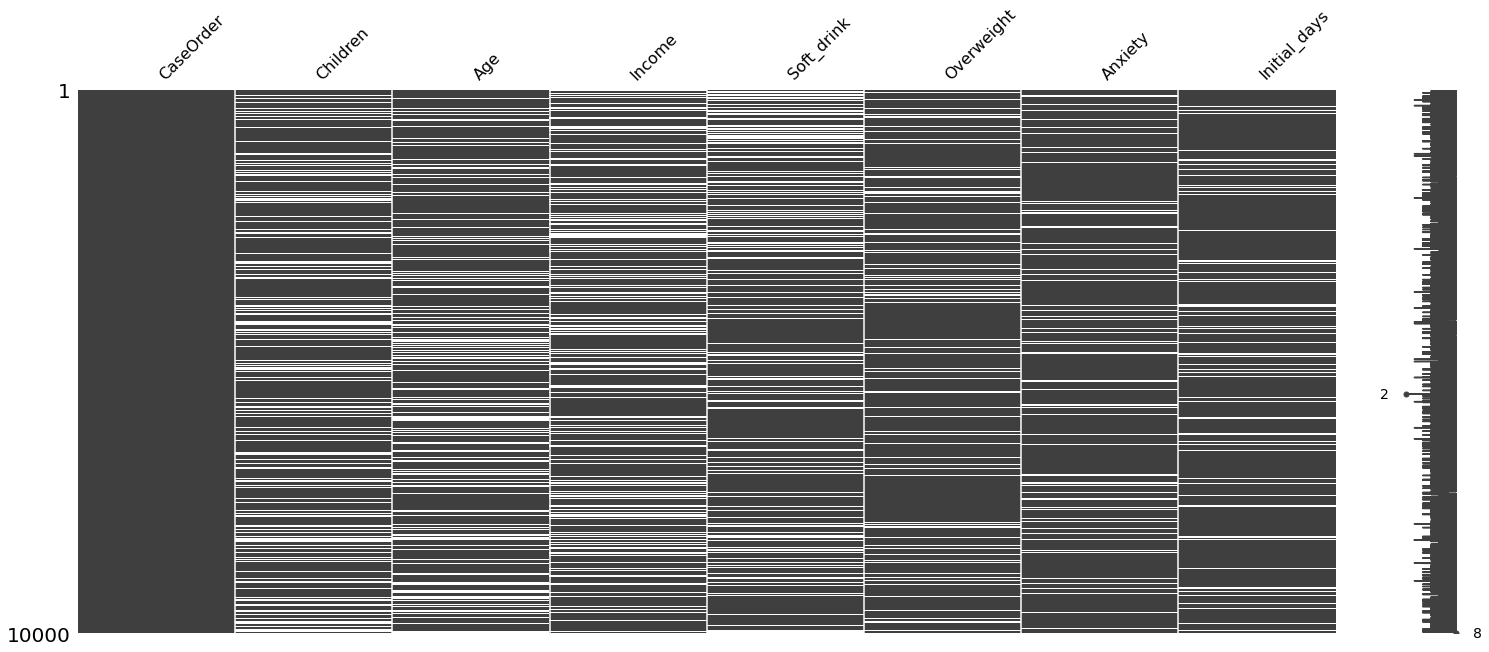

In [806]:
_ = msno.matrix(missing_df) 

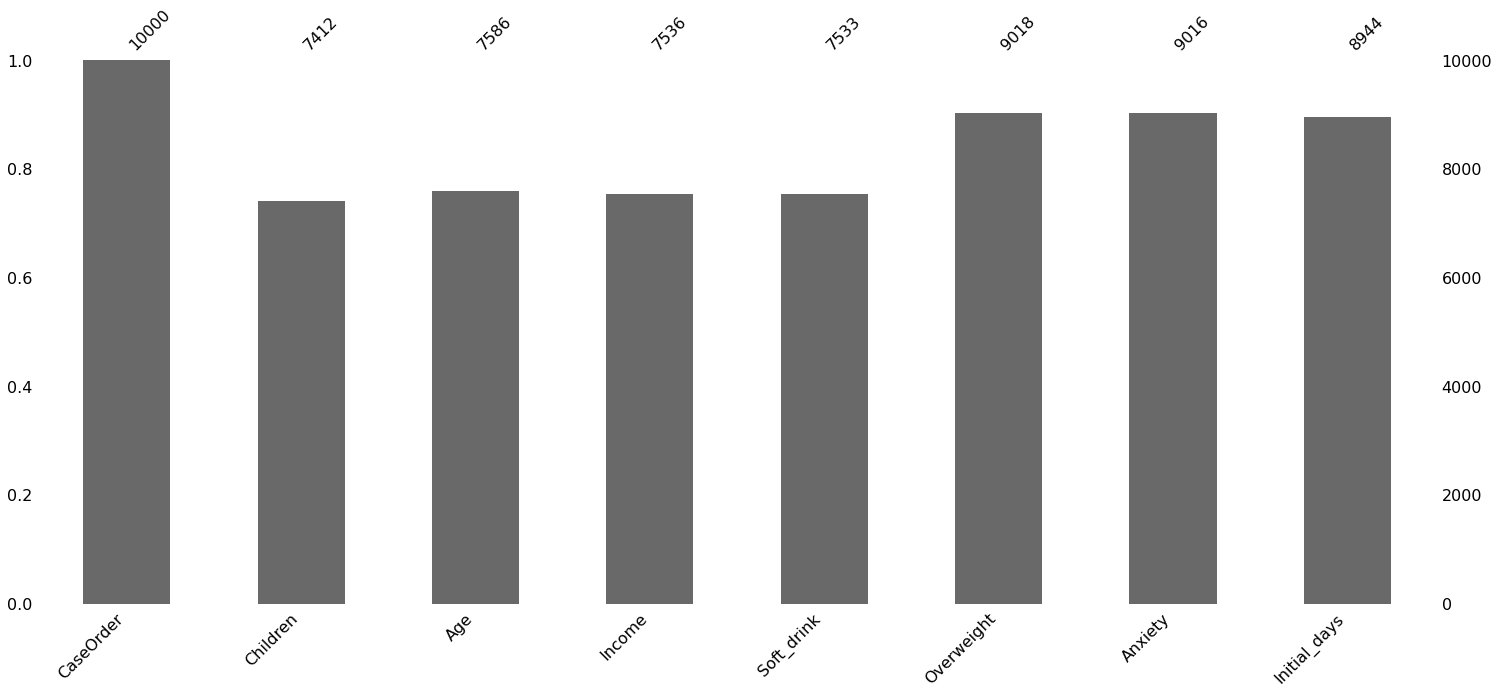

In [805]:
_ = msno.bar(missing_df)

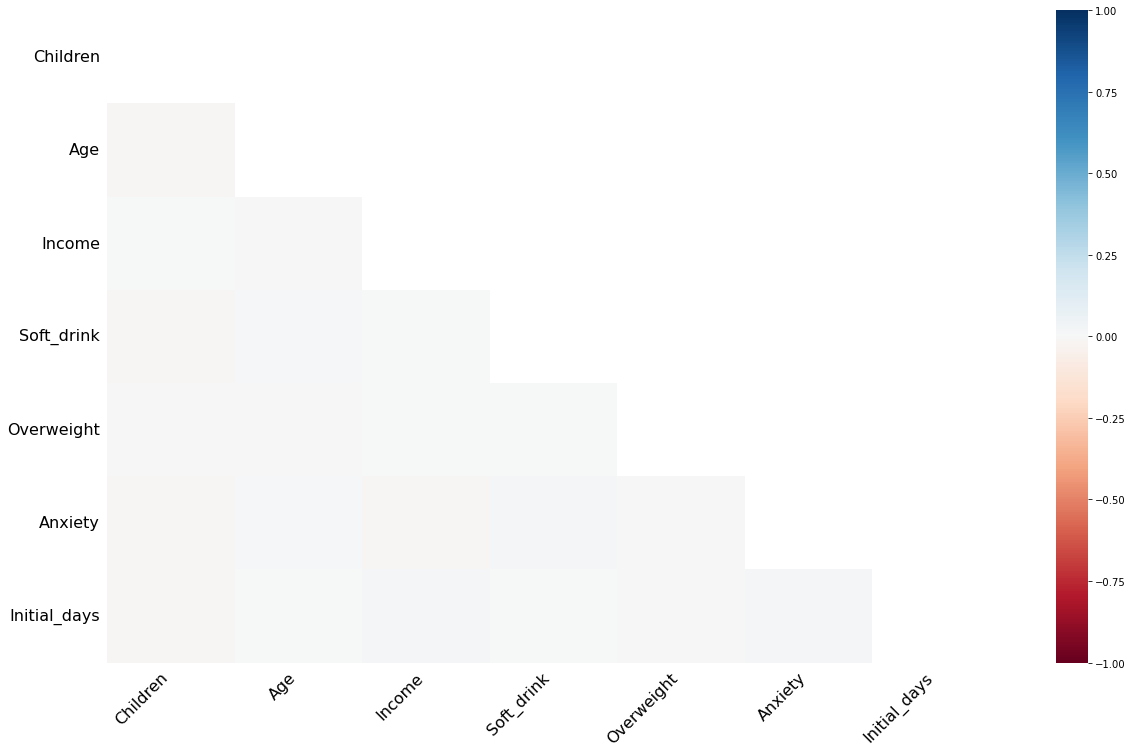

In [807]:
_ = msno.heatmap(missing_df)

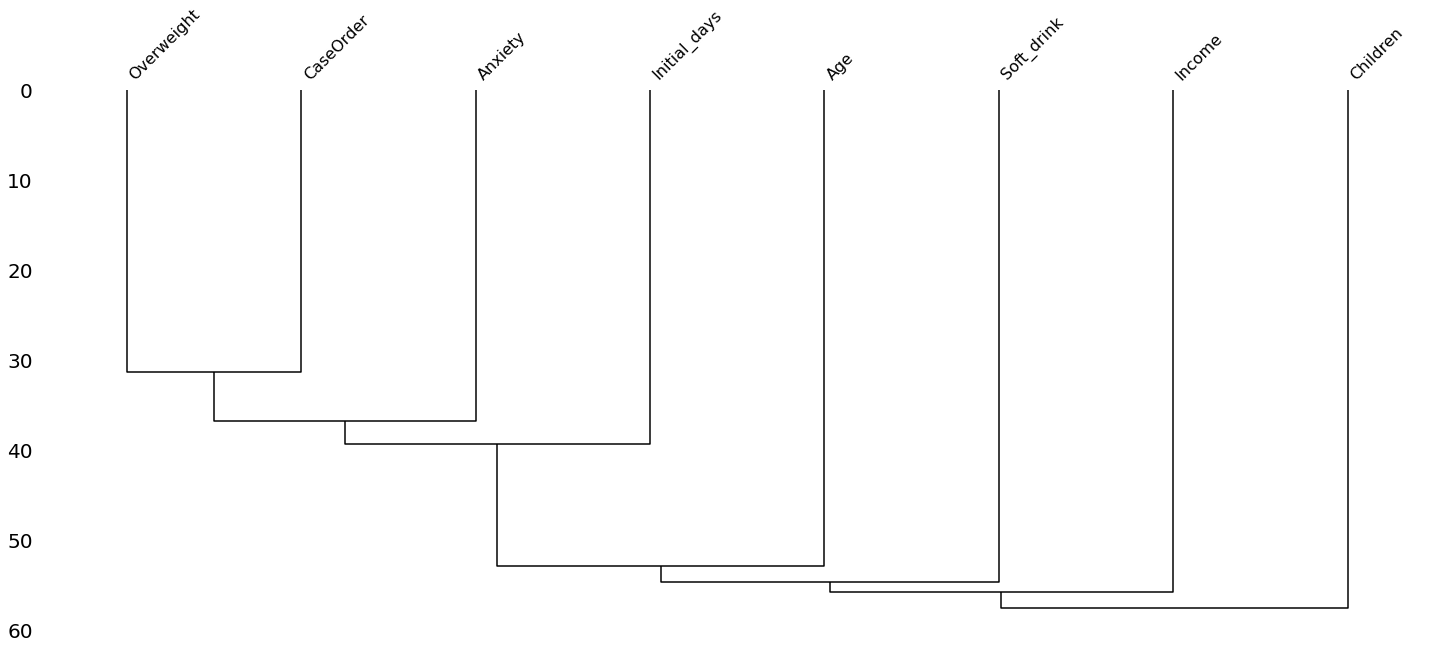

In [808]:
_ = msno.dendrogram(missing_df)

### Detect Outliers

#### Z-Scores

- Write the code for calculating the zscore
    - df[‘NewColumnForZScores']=stats.zscore(df[‘columnname’])
- Write Code to display the calculated z score and the values
    - df[[‘Columnname’,’Columnforzscore']].head
- Use visualizations to examine the outliers (based upon z score). You can also find outliers by using the query() function, which identifies rows that meet a particular condition.


In [1106]:
def get_zscore_cols(df):
    numeric_df = df.select_dtypes(include=['int64', 'float64']).apply(pd.to_numeric)
    z_score_df = np.abs(stats.zscore(numeric_df, nan_policy='omit')) > 3
    
    outlier_df = z_score_df.sum()
    outlier_counts_df = outlier_df[outlier_df > 0]

    return outlier_counts_df.index

# numerical columns with notable outliers
ignored_outlier_cols = ['Lat', 'Lng', 'Population', 'Age', 'Income', 'TotalCharge', 'Additional_charges', 'Doc_visits']

# store the relevant zscore columns
z_score_cols = list(set(get_zscore_cols(df)) - set(ignored_outlier_cols))
# list(set(get_zscore_cols(df)) )

['Doc_visits',
 'TotalCharge',
 'Item2',
 'Item5',
 'Item3',
 'Income',
 'Lng',
 'Population',
 'VitD_levels',
 'Item1',
 'Item7',
 'Item4',
 'Full_meals_eaten',
 'Item8',
 'Lat',
 'Children',
 'Item6',
 'VitD_supp']

In [1105]:
print("cols", z_score_cols)

zscore_df = df[z_score_cols].copy()

for col in z_score_cols:
    zscore_df[f"{col}_zscore"] = stats.zscore(df[col], nan_policy='omit')
    # print values where their absolute values exceeds a z-score of > 3
    zscore_df.loc[abs(zscore_df[f"{col}_zscore"]) > 3, [col, f"{col}_zscore"]]

cols ['Item2', 'Item5', 'Item3', 'VitD_levels', 'Item1', 'Item7', 'Item4', 'Full_meals_eaten', 'Item8', 'Children', 'Item6', 'VitD_supp']


Item2  Item2_zscore
501       7       3.37591
1764      7       3.37591
5016      7       3.37591
5247      7       3.37591
5298      7       3.37591
6000      7       3.37591
7431      7       3.37591
8326      7       3.37591
8376      7       3.37591
9113      7       3.37591
9352      7       3.37591
9763      7       3.37591

Item5  Item5_zscore
371       7      3.400603
2444      7      3.400603
2751      7      3.400603
2901      7      3.400603
3784      7      3.400603
4322      7      3.400603
4754      7      3.400603
4881      7      3.400603
5209      7      3.400603
5992      7      3.400603
7227      7      3.400603
8100      7      3.400603
8151      7      3.400603

Item3  Item3_zscore
1028      7      3.378414
1642      7      3.378414
2939      7      3.378414
3805      7      3.378414
4050      7      3.378414
4407      7      3.378414
6686      7      3.378414
8822      8      4.346746
8964      7      3.378414
9113      7      3.378414
9528      7      3.378414
9827      7      3.378414

VitD_levels  VitD_levels_zscore
11      47.813476            4.224461
94      49.256313            4.439075
106     49.205398            4.431501
147     47.757384            4.216117
170     44.553973            3.739628
...           ...                 ...
9841    47.899167            4.237207
9907    51.202138            4.728505
9929    44.494793            3.730825
9933    45.440725            3.871527
9973    47.439599            4.168849

[500 rows x 2 columns]

Item1  Item1_zscore
116       7      3.373537
420       7      3.373537
2356      7      3.373537
3772      7      3.373537
5016      7      3.373537
5298      7      3.373537
5375      7      3.373537
5949      7      3.373537
6488      7      3.373537
6790      8      4.342610
7431      7      3.373537

Item7  Item7_zscore
599       7      3.432698
2010      7      3.432698
3790      7      3.432698
4850      7      3.432698
6646      7      3.432698
7527      7      3.432698
7843      7      3.432698
8142      7      3.432698
8165      7      3.432698
8209      7      3.432698
8720      7      3.432698

Item4  Item4_zscore
448       7      3.363057
2101      7      3.363057
3178      7      3.363057
3225      7      3.363057
4211      7      3.363057
4776      7      3.363057
5300      7      3.363057
6461      7      3.363057
6983      7      3.363057
7585      7      3.363057
9708      7      3.363057
9798      7      3.363057

Full_meals_eaten  Full_meals_eaten_zscore
550                  5                 3.966603
697                  5                 3.966603
958                  7                 5.950600
1148                 5                 3.966603
1231                 6                 4.958602
1456                 5                 3.966603
2184                 6                 4.958602
2315                 5                 3.966603
2652                 5                 3.966603
2746                 5                 3.966603
2877                 5                 3.966603
2919                 5                 3.966603
4345                 5                 3.966603
4709                 7                 5.950600
4902                 5                 3.966603
5367                 5                 3.966603
5543                 5                 3.966603
5597                 5                 3.966603
5711                 5                 3.966603
5859                 5                 3.966603
6026                 5                 3.966603
6068                 6                 4.958602
6083                 5                 3.966603
6694                 5                 3.966603
6802                 5                 3.966603
7217                 6                 4.958602
8144                 6                 4.958602
8326                 5                 3.966603
8902                 5                 3.966603
8994                 5                 3.966603
9067                 5                 3.966603
9220                 5                 3.966603
9986                 6                 4.958602

Item8  Item8_zscore
248       7      3.348781
898       7      3.348781
1096      7      3.348781
1402      7      3.348781
2054      7      3.348781
2736      7      3.348781
3300      7      3.348781
3395      7      3.348781
5949      7      3.348781
6508      7      3.348781
8326      7      3.348781
9799      7      3.348781

Children  Children_zscore
16        10.0         3.666241
79         9.0         3.202265
156       10.0         3.666241
180       10.0         3.666241
185       10.0         3.666241
...        ...              ...
9486       9.0         3.202265
9658      10.0         3.666241
9718       9.0         3.202265
9798       9.0         3.202265
9845      10.0         3.666241

[146 rows x 2 columns]

Item6  Item6_zscore
565       7      3.368612
1755      7      3.368612
1952      7      3.368612
2574      7      3.368612
2871      7      3.368612
4141      7      3.368612
4808      7      3.368612
6790      7      3.368612
7359      7      3.368612
7553      7      3.368612

VitD_supp  VitD_supp_zscore
62            3          4.138759
63            3          4.138759
206           3          4.138759
249           3          4.138759
837           3          4.138759
...         ...               ...
9091          4          5.729917
9589          3          4.138759
9790          3          4.138759
9908          3          4.138759
9982          3          4.138759

[70 rows x 2 columns]

#### Boxplots

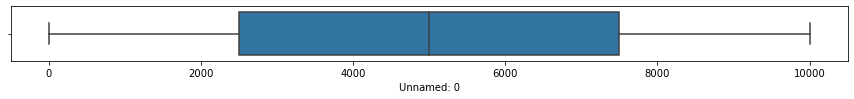

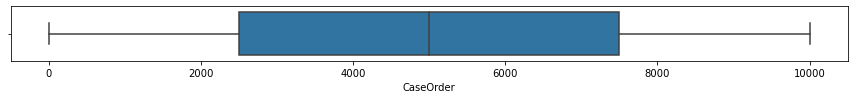

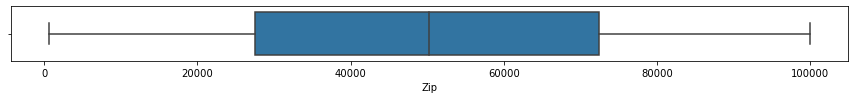

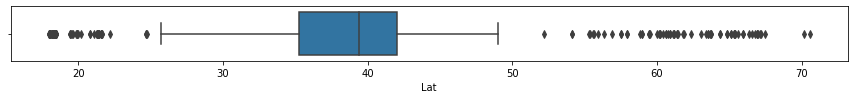

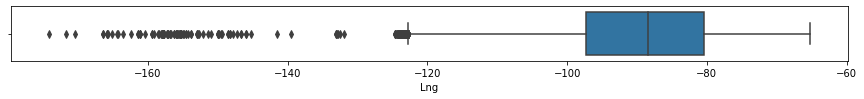

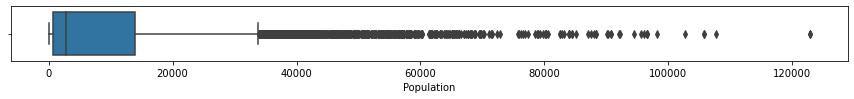

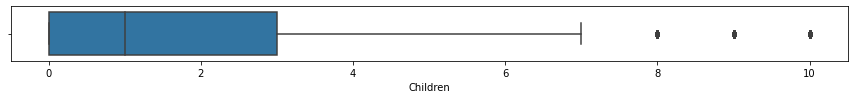

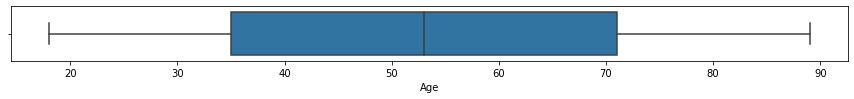

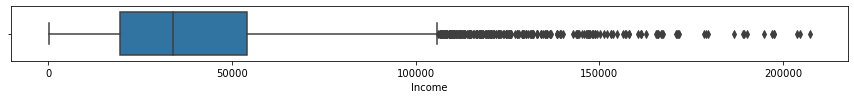

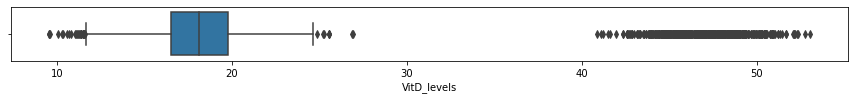

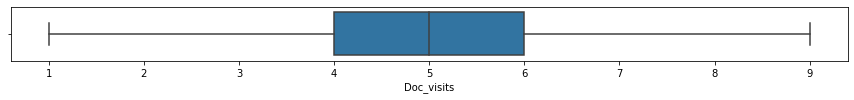

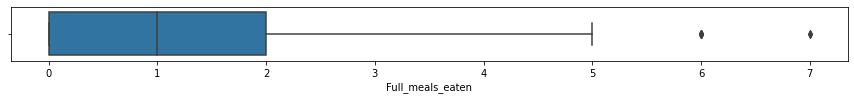

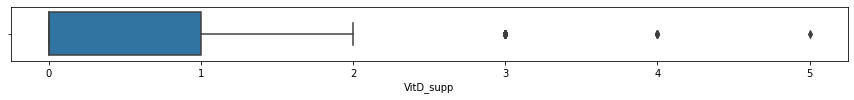

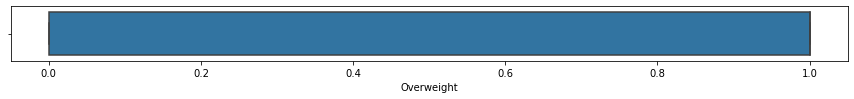

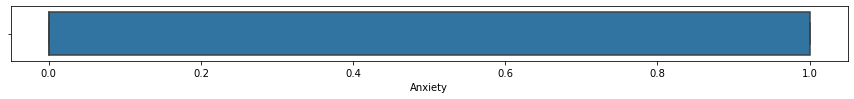

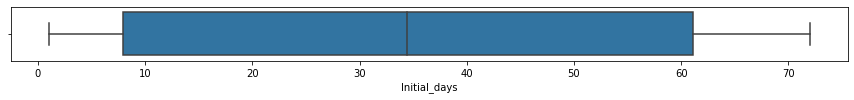

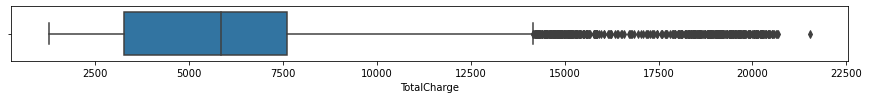

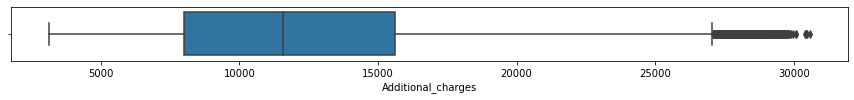

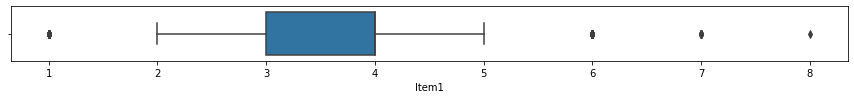

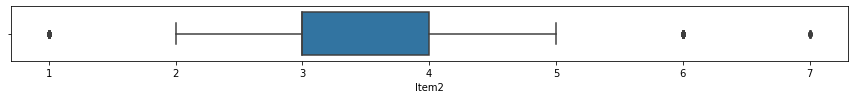

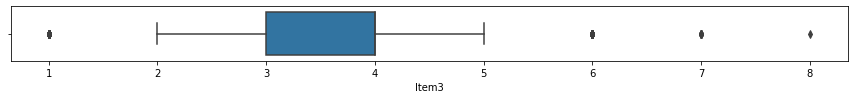

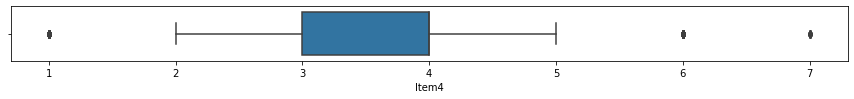

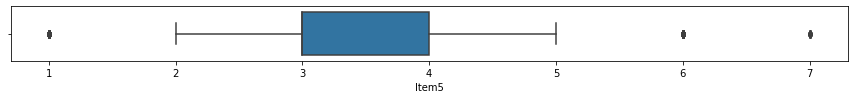

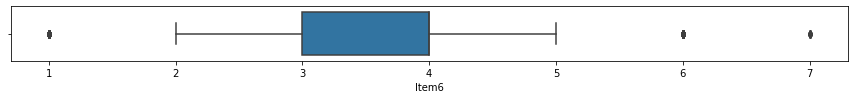

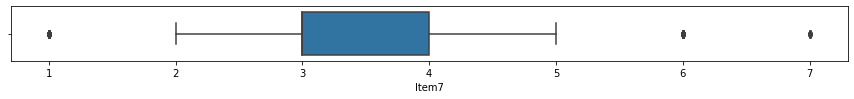

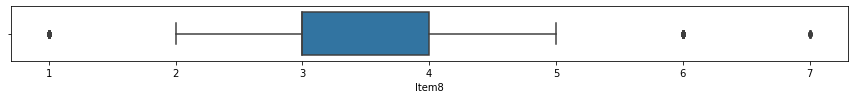

In [1098]:
# create a histogram for numerical columns
def create_boxplots(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        fig = plt.figure(figsize =(15, 1))
        _ = sns.boxplot(x=col, data=df, labels=[col], orient="h")
        plt.show()
        

create_boxplots(df)

# display boxplots with known and relevant outliers
# create_boxplots(df[z_score_cols])

#### Histograms

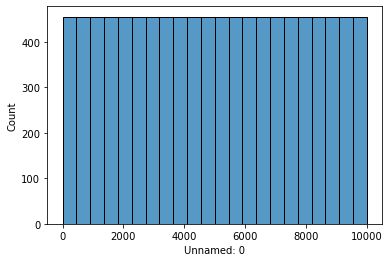

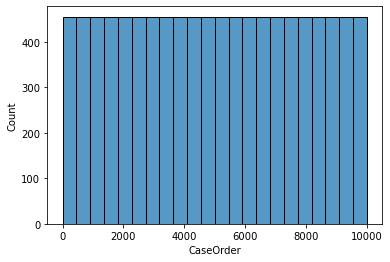

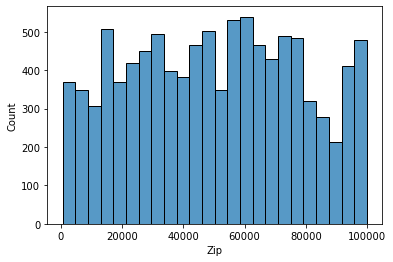

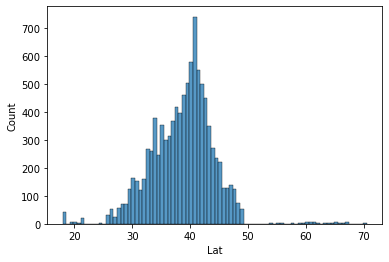

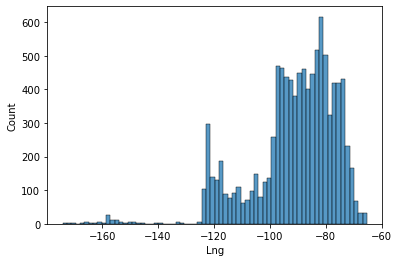

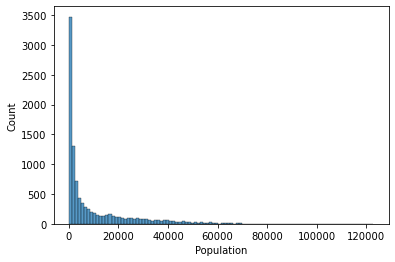

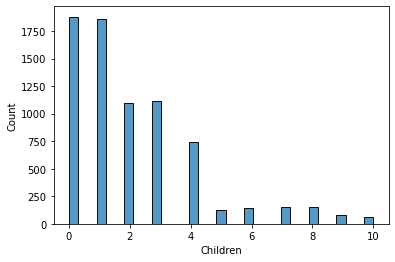

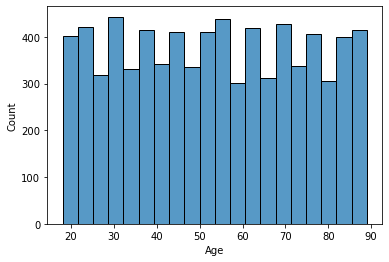

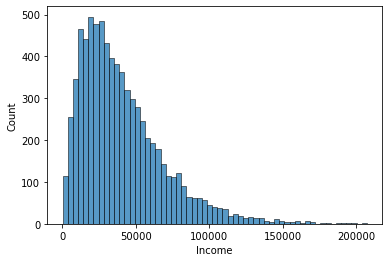

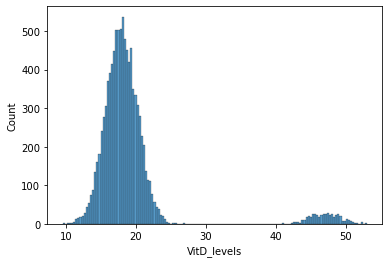

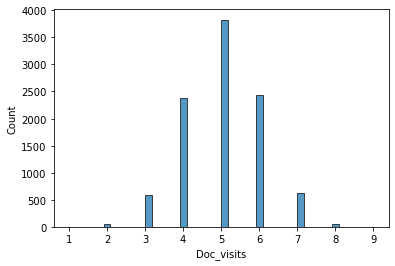

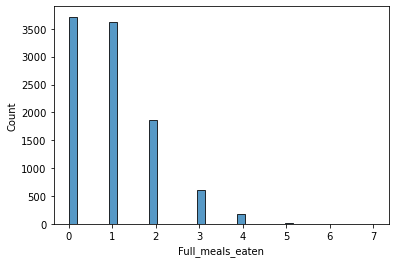

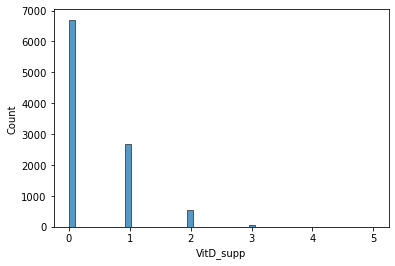

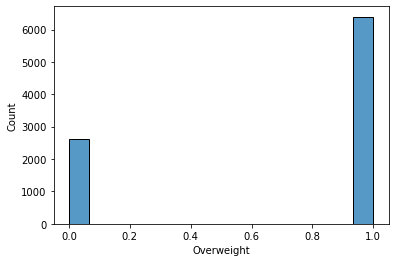

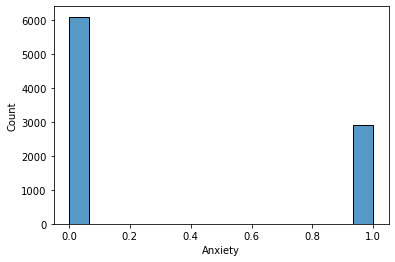

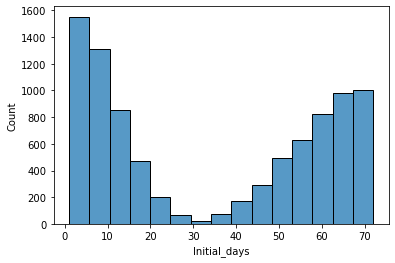

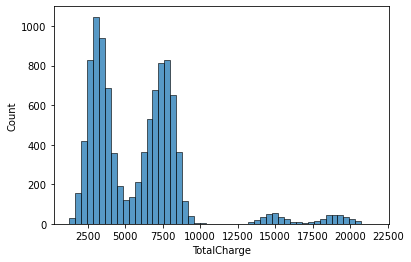

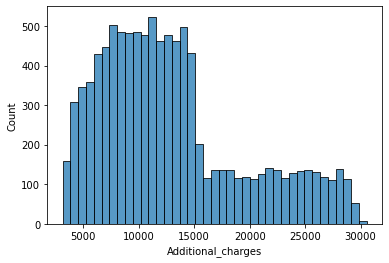

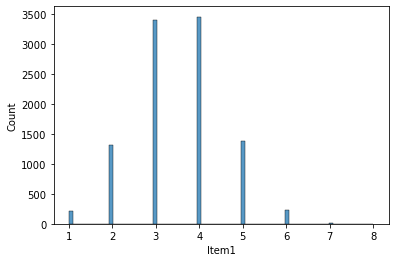

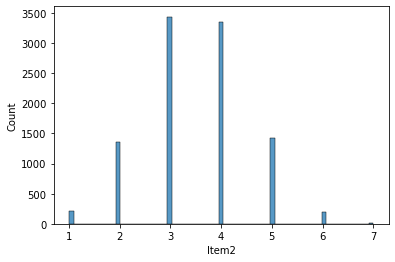

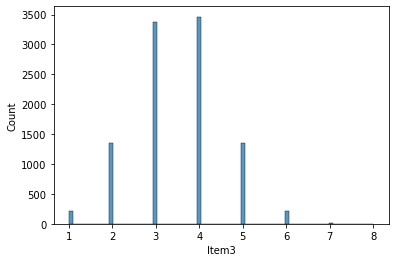

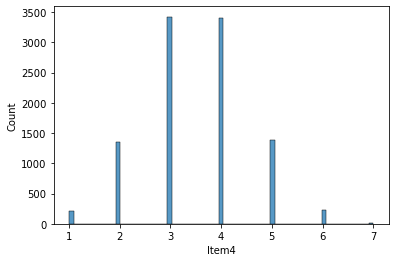

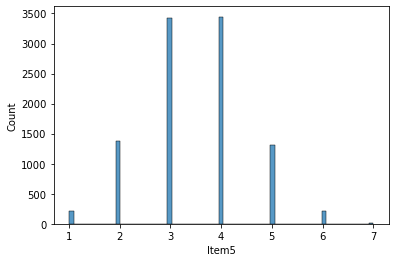

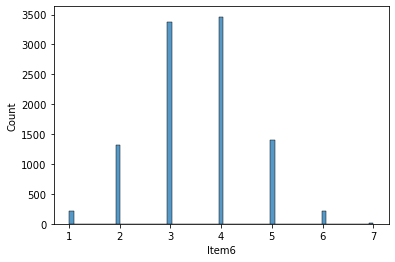

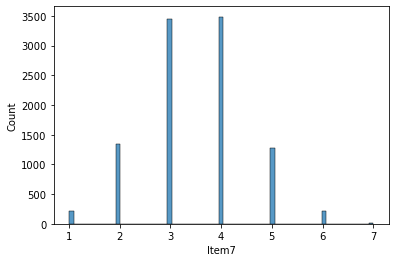

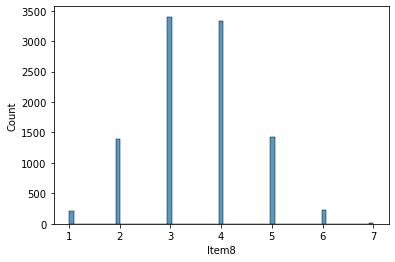

In [1101]:
def create_histograms(df):
    # create a histogram for numerical columns
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        _ = sns.histplot(data=df, x=col)
        plt.show()
        
create_histograms(df)        

### Re-Expression Categories

In [36]:
# convert categorical string values to category data type

# convert "Soft_drink" nan's to 'No'
df.loc[df["Soft_drink"].isna(), "Soft_drink"] = "No"

# convert "Overweight" float64's to Yes/No bools
df["Overweight"] = df["Overweight"].map({np.nan: 'No', 0: 'No', 1: 'Yes'})

# validate a value exists for each row
assert len(df["Soft_drink"].isna().index) == len(df.index)

# categorical columns and potential categorical columns
ctg_cols = ["Area", "Timezone", "Employment", "Education",  "Marital", "Gender", "ReAdmis", "Soft_drink", "Initial_admin", "HighBlood", "Stroke", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma", "Services"]

for col in ctg_cols:
    # print(df[col].unique())
    print(f"--- COLUMN: '{col}' ---")    
    # sort the unique values and print 1 value per line
    # print(*np.sort(df[col].unique()), sep='\n', end="\n\n")

    # convert column to a category
    df = df.astype({col: "category"})

    # confirm the values successfully converted     
    assert df[col].dtype == "category"
    
    # report categorical counts     
    print(df[col].value_counts(), end="\n\n")    
    print()

--- COLUMN: 'Area' ---
Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64


--- COLUMN: 'Timezone' ---
America/New_York                  3889
America/Chicago                   3771
America/Los_Angeles                937
America/Denver                     612
America/Detroit                    262
America/Indiana/Indianapolis       151
America/Phoenix                    100
America/Boise                       86
America/Anchorage                   50
America/Puerto_Rico                 43
Pacific/Honolulu                    34
America/Menominee                   14
America/Nome                        12
America/Indiana/Vincennes            8
America/Sitka                        6
America/Kentucky/Louisville          6
America/Toronto                      5
America/Indiana/Tell_City            3
America/Indiana/Marengo              3
America/North_Dakota/Beulah          2
America/Indiana/Winamac              1
America/Indiana/Vevay                1
America/North_

### Cleaning text data



In [37]:
df.head()

Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1           2          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2           3          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3           4          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4           5          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  Population      Area          Timezone  \
0  34.34960 -86.72508        2951  Suburban   America/Chicago   
1  30.84513 -85.22907       11303     Urban   America/Chicago   
2  43.54321 -96.63772       17125  Suburban   America/Chicago   
3  43.89744 -93.51479        2162  Suburban   America/Chicago   
4  37.59894 -76.88958        5287     Rural  America/New_York   

                                Job  Children   Age  \
0  Psychologist, sport and exercise       1.0  53.0   
1      Community development worker       3.0  51.0   
2           Chief Executive Officer       3.0  53.0   
3               Early years teacher       0.0  78.0   
4       Health promotion specialist       NaN  22.0   

                                  Education Employment    Income   Marital  \
0            Some College, Less than 1 Year  Full Time  86575.93  Divorced   
1  Some College, 1 or More Years, No Degree  Full Time  46805.99   Married   
2  Some College, 1 or More Years, No Degree    Retired  14370.14   Widowed   
3             GED or Alternative Credential    Retired  39741.49   Married   
4               Regular High School Diploma  Full Time   1209.56   Widowed   

   Gender ReAdmis  VitD_levels  Doc_visits  Full_meals_eaten  VitD_supp  \
0    Male      No    17.802330           6                 0          0   
1  Female      No    18.994640           4                 2          1   
2  Female      No    17.415889           4                 1          0   
3    Male      No    17.420079           4                 1          0   
4  Female      No    16.870524           5                 0          2   

  Soft_drink        Initial_admin HighBlood Stroke Complication_risk  \
0         No  Emergency Admission       Yes     No            Medium   
1         No  Emergency Admission       Yes     No              High   
2         No   Elective Admission       Yes     No            Medium   
3         No   Elective Admission        No    Yes            Medium   
4        Yes   Elective Admission        No     No               Low   

  Overweight Arthritis Diabetes Hyperlipidemia BackPain  Anxiety  \
0         No       Yes      Yes             No      Yes      1.0   
1        Yes        No       No             No       No      NaN   
2        Yes        No      Yes             No       No      NaN   
3         No       Yes       No             No       No      NaN   
4         No        No       No            Yes       No      0.0   

  Allergic_rhinitis Reflux_esophagitis Asthma     Services  Initial_days  \
0               Yes                 No    Yes   Blood Work     10.585770   
1                No                Yes     No  Intravenous     15.129562   
2                No                 No     No   Blood Work      4.772177   
3                No                Yes    Yes   Blood Work      1.714879   
4               Yes                 No     No      CT Scan      1.254807   

   TotalCharge  Additional_charges  Item1  Item2  Item3  Item4  Item5  Item6  \
0  3191.048774        17939.4034

### Other Data Cleaning

In [38]:
# Verify these columns are the same, if so drop the "Unnamed: 0" column
if df["Unnamed: 0"].equals(df["CaseOrder"]):
    df.drop(columns="Unnamed: 0", axis=1)    

CaseOrder Customer_id                           Interaction  \
0             1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1             2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2             3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3             4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4             5     C544523  5885f56b-d6da-43a3-8760-83583af94266   
...         ...         ...                                   ...   
9995       9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9996       9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9997       9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9998       9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
9999      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                                   UID          City State        County  \
0     3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan   
1     176354c5eef714957d486009feabf195      Marianna    FL       Jackson   
2     e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha   
3     cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca   
4     d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William   
...                                ...           ...   ...           ...   
9995  39184dc28cc038871912ccc4500049e5       Norlina    NC        Warren   
9996  3cd124ccd43147404292e883bf9ec55c        Milmay    NJ      Atlantic   
9997  41b770aeee97a5b9e7f69c906a8119d7     Southside    TN    Montgomery   
9998  2bb491ef5b1beb1fed758cc6885c167a         Quinn    SD    Pennington   
9999  95663a202338000abdf7e09311c2a8a1    Coraopolis    PA     Allegheny   

        Zip       Lat        Lng  Population      Area          Timezone  \
0     35621  34.34960  -86.72508        2951  Suburban   America/Chicago   
1     32446  30.84513  -85.22907       11303     Urban   America/Chicago   
2     57110  43.54321  -96.63772       17125  Suburban   America/Chicago   
3     56072  43.89744  -93.51479        2162  Suburban   America/Chicago   
4     23181  37.59894  -76.88958        5287     Rural  America/New_York   
...     ...       ...        ...         ...       ...               ...   
9995  27563  36.42886  -78.23716        4762     Urban  America/New_York   
9996   8340  39.43609  -74.87302        1251     Urban  America/New_York   
9997  37171  36.36655  -87.29988         532     Rural   America/Chicago   
9998  57775  44.10354 -102.01593         271     Rural    America/Denver   
9999  15108  40.49998  -80.19959       41524     Urban  America/New_York   

                                       Job  Children   Age  \
0         Psychologist, sport and exercise       1.0  53.0   
1             Community development worker       3.0  51.0   
2                  Chief Executive Officer       3.0  53.0   
3                      Early years teacher       0.0  78.0   
4              Health promotion specialist       NaN  22.0   
...                                    ...       ...   ...   
9995                Programmer, multimedia       NaN  25.0   
9996         Restaurant manager, fast food       4.0  87.0   
9997            Psychologist, occupational       3.0   NaN   
9998  Outdoor activities/education manager       3.0  43.0   
9999            Sports development officer       8.0   NaN   

                                     Education Employment    Income  \
0               Some College, Less than 1 Year  Full Time  86575.93   
1     Some College, 1 or More Years, No Degree  Full Time  46805.99   
2     Some College, 1 or More Years, No Degree    Retired  14370.14   
3                GED or Alternative Credential    Retired  39741.49   
4                  Regular High School Diploma  Full Time   1209.56   
...                                        ...        ...       ...   
9995                         Bachelor's Degree    Student  45967.61   
9996               Regular High School

In [39]:
df[df.duplicated(subset=['Customer_id', 'Interaction', 'UID'])]
df[df['Unnamed: 0'] != df['CaseOrder']]

# df.duplicated?

Empty DataFrame
Columns: [Unnamed: 0, CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, VitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []

Empty DataFrame
Columns: [Unnamed: 0, CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, VitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []

## C2: Justification of Approach
Explain the plan for cleaning the data by doing the following:

2.  Justify your approach for assessing the quality of the data, include:

•  characteristics of the data being assessed,

•  the approach used to assess the quality.

## C3: Justification of Tools
Explain the plan for cleaning the data by doing the following:

3.  Justify your selected programming language and any libraries and packages that will support the data-cleaning process.
    - Python
    - Jupyter Notebooks
    - numpy as np
    - numpy
    - pandas
    - matplotlib.pyplot
    - seaborn
    - missingno
    - sklearn
      - accuracy_score, GradientBoostingRegressor, LassoCV, PCA, RandomForestRegressor, RFE, StandardScaler, SVC, train_test_split, VarianceThreshold
    - fuzzywuzzy
        - process
    - fancyimpute
        - KNN, IterativeImputer
    - statsmodels.api 
      

## C4: Provide the Code
Explain the plan for cleaning the data by doing the following:

4.  Provide the code you will use to identify the anomalies in the data.

In [40]:
df = pd.read_csv(filename)

In [41]:
df.dtypes
print("Shape\n", df.shape, end="\n\n")
print("Columns\n", df.columns, end="\n\n")
print("Index\n", df.index, end="\n\n")
df.info()

Unnamed: 0              int64
CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
Timezone               object
Job                    object
Children              float64
Age                   float64
Education              object
Employment             object
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
VitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight            float64
Arthritis 

Shape
 (10000, 53)

Columns
 Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

Index
 RangeIndex(start=0, stop=10000, step=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------             

In [42]:
df.describe()

Unnamed: 0    CaseOrder           Zip           Lat           Lng  \
count  10000.00000  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000   5000.50000  50159.323900     38.751099    -91.243080   
std     2886.89568   2886.89568  27469.588208      5.403085     15.205998   
min        1.00000      1.00000    610.000000     17.967190   -174.209690   
25%     2500.75000   2500.75000  27592.000000     35.255120    -97.352982   
50%     5000.50000   5000.50000  50207.000000     39.419355    -88.397230   
75%     7500.25000   7500.25000  72411.750000     42.044175    -80.438050   
max    10000.00000  10000.00000  99929.000000     70.560990    -65.290170   

          Population     Children          Age         Income   VitD_levels  \
count   10000.000000  7412.000000  7586.000000    7536.000000  10000.000000   
mean     9965.253800     2.098219    53.295676   40484.438268     19.412675   
std     14824.758614     2.155427    20.659182   28664.861050      6.723277   
min         0.000000     0.000000    18.000000     154.080000      9.519012   
25%       694.750000     0.000000    35.000000   19450.792500     16.513171   
50%      2769.000000     1.000000    53.000000   33942.280000     18.080560   
75%     13945.000000     3.000000    71.000000   54075.235000     19.789740   
max    122814.000000    10.000000    89.000000  207249.130000     53.019124   

         Doc_visits  Full_meals_eaten     VitD_supp   Overweight      Anxiety  \
count  10000.000000      10000.000000  10000.000000  9018.000000  9016.000000   
mean       5.012200          1.001400      0.398900     0.709137     0.322316   
std        1.045734          1.008117      0.628505     0.454186     0.467389   
min        1.000000          0.000000      0.000000     0.000000     0.000000   
25%        4.000000          0.000000      0.000000     0.000000     0.000000   
50%        5.000000          1.000000      0.000000     1.000000     0.000000   
75%        6.000000          2.000000      1.000000     1.000000     1.000000   
max        9.000000          7.000000      5.000000     1.000000     1.000000   

       Initial_days   TotalCharge  Additional_charges         Item1  \
count   8944.000000  10000.000000        10000.000000  10000.000000   
mean      34.432082   5891.538261        12934.528586      3.518800   
std       26.287050   3377.558136         6542.601544      1.031966   
min        1.001981   1256.751699         3125.702716      1.000000   
25%        7.911709   3253.239465         7986.487642      3.000000   
50%       34.446941   5852.250564        11573.979365      4.000000   
75%       61.124654   7614.989701        15626.491033      4.000000   
max       71.981486  21524.224210        30566.073130      8.000000   

              Item2         Item3         Item4         Item5         Item6  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       3.506700      3.511100      3.515100      3.496900      3.522500   
std        1.034825      1.032755      1.036282      1.030192      1.032376   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        3.000000      3.000000      3.000000      3.000000      3.000000   
50%        3.000000      4.000000      4.000000      3.000000      4.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        7.000000      8.000000      7.000000      7.000000      7.000000   

              Item7         Item8  
count  10000.000000  10000.000000  
mean       3.494000      3.509700  
std        1.021405      1.042312  
min        1.000000      1.000000  
25%        3.000000      3.000000  
50%        3.000000      3.000000  
75%        4.000000      4.000000  
max        7.000000      7.000000

In [43]:
df.head(1)

Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   

                                UID City State  County    Zip      Lat  \
0  3a83ddb66e2ae73798bdf1d705dc0932  Eva    AL  Morgan  35621  34.3496   

        Lng  Population      Area         Timezone  \
0 -86.72508        2951  Suburban  America/Chicago   

                                Job  Children   Age  \
0  Psychologist, sport and exercise       1.0  53.0   

                        Education Employment    Income   Marital Gender  \
0  Some College, Less than 1 Year  Full Time  86575.93  Divorced   Male   

  ReAdmis  VitD_levels  Doc_visits  Full_meals_eaten  VitD_supp Soft_drink  \
0      No     17.80233           6                 0          0        NaN   

         Initial_admin HighBlood Stroke Complication_risk  Overweight  \
0  Emergency Admission       Yes     No            Medium         0.0   

  Arthritis Diabetes Hyperlipidemia BackPain  Anxiety Allergic_rhinitis  \
0       Yes      Yes             No      Yes      1.0               Yes   

  Reflux_esophagitis Asthma    Services  Initial_days  TotalCharge  \
0                 No    Yes  Blood Work      10.58577  3191.048774   

   Additional_charges  Item1  Item2  Item3  Item4  Item5  Item6  Item7  Item8  
0         17939.40342      3      3      2      2      4      3      3      4

In [44]:
missing  = df.isnull().sum()
pct_missing = (missing[missing > 0] / len(df.index) * 100).sort_values(ascending=False, axis=0)
pct_missing


# get column names for any columns with missing values
# df.columns[df.isnull().any()]

Children        25.88
Soft_drink      24.67
Income          24.64
Age             24.14
Initial_days    10.56
Anxiety          9.84
Overweight       9.82
dtype: float64

<AxesSubplot:>

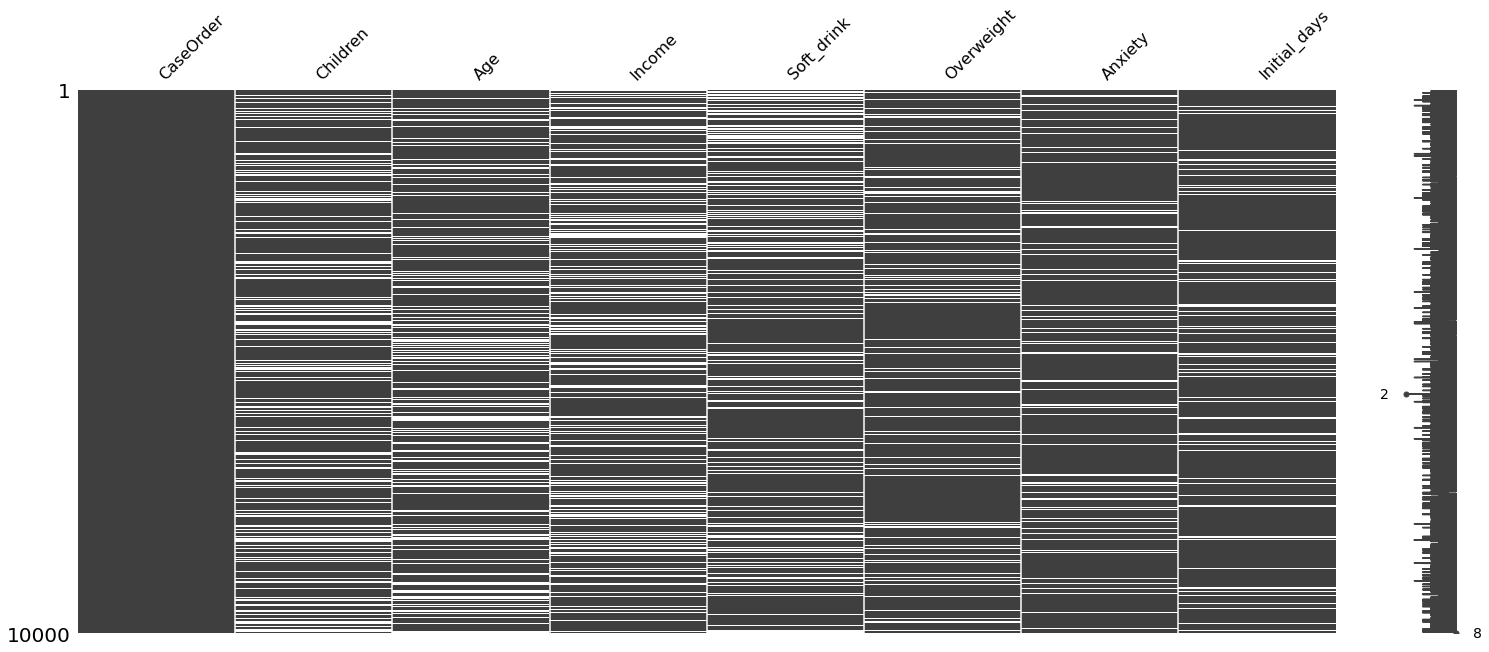

In [45]:
# ['CaseOrder'] +
missing_df = df[['CaseOrder'] + list(df.columns[df.isnull().any()])].sort_values('CaseOrder')
msno.matrix(missing_df) 
# msno.bar(missing_df)
# msno.heatmap(missing_df)

/var/folders/dl/vq577pv129dffsrtm__9bd380000gn/T/ipykernel_6210/4179717664.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'CaseOrder'}>,
        <AxesSubplot:title={'center':'Zip'}>,
        <AxesSubplot:title={'center':'Lat'}>,
        <AxesSubplot:title={'center':'Lng'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'VitD_levels'}>],
       [<AxesSubplot:title={'center':'Doc_visits'}>,
        <AxesSubplot:title={'center':'Full_meals_eaten'}>,
        <AxesSubplot:title={'center':'VitD_supp'}>,
        <AxesSubplot:title={'center':'Overweight'}>,
        <AxesSubplot:title={'center':'Anxiety'}>],
       [<AxesSubplot:title={'center':'Initial_days'}>,
        <AxesSubplot:title={'center':'TotalCharge'}>,
        <AxesSubplot:title={'center':'Additional_charges'}>,
        <AxesSubplot:title={'center':'Item1'}>,
        <AxesSub

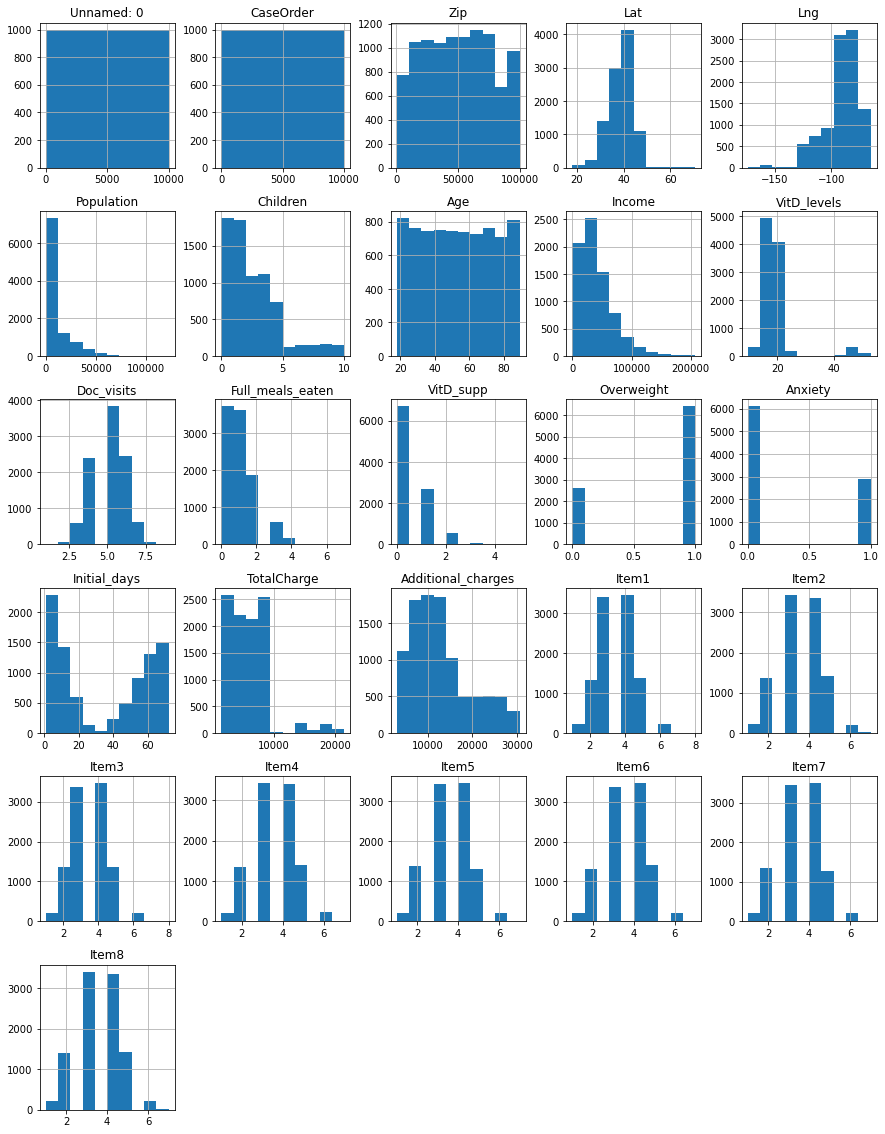

Signature: fig.gca(**kwargs)
Docstring:
Get the current Axes, creating one if necessary.

The following kwargs are supported for ensuring the returned Axes
adheres to the given projection etc., and for Axes creation if
the active Axes does not exist:

Properties:
    adjustable: {'box', 'datalim'}
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
    alpha: scalar or None
    anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
    animated: bool
    aspect: {'auto', 'equal'} or float
    autoscale_on: bool
    autoscalex_on: bool
    autoscaley_on: bool
    axes_locator: Callable[[Axes, Renderer], Bbox]
    axisbelow: bool or 'line'
    box_aspect: float or None
    clip_box: `.Bbox`
    clip_on: bool
    clip_path: Patch or (Path, Transform) or None
    contains: unknown
    facecolor or fc: color
    figure: `.Figure`
    frame_on: bool
    gid: str
    in_layout: bool
    label: object
    navigate: bool
    na

In [46]:
# df.hist(figsize=(75, 75))
# plt.tight_layout()
# plt.show()

# find cols with null values

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
fig.gca?
df.hist(ax = ax)

In [47]:
# DataFrame.plot.bar(x=None, y=None, **kwargs)
# df.plot.bar(index=1)
# df
# df.plot.bar(rot=0)
# df.hist(ax = ax)

In [48]:
df['Customer_id'].str.len().unique()
# df[df['Customer_id'].str.len() == 6]
df['State'].str.len().unique()
df['UID'].str.len().unique()
df['Interaction'].str.len().unique()
df['Zip'].astype(str).str.len().unique()
df[df['Zip'].astype(str).str.len() == 3]

df['Lat'].astype(str).str.len().unique()
df['Lng'].astype(str).str.len().unique()
df[df['Lng'].astype(str).str.len() == 10]

array([7, 6])

array([2])

array([32])

array([36])

array([5, 4, 3])

Unnamed: 0  CaseOrder Customer_id                           Interaction  \
225          226        226     K383477  b100ac14-e64f-4240-a24f-040a6f035c3c   
910          911        911     W571350  7d968cf5-5768-488e-941b-6d3a968e0ba2   
944          945        945     I293001  c5314d07-5984-4572-b727-cb484d00b67e   
1264        1265       1265     L399996  a8071626-9926-47e9-89ee-4ae1a2233c94   
1339        1340       1340      P72123  c277e52a-99f5-4fdb-a17d-1ac83b16435a   
1378        1379       1379     S296435  427c678e-e789-48a2-a9b3-1bd8065b5022   
1486        1487       1487     A198871  6b58a1dd-e9a8-485d-b517-fa2888384bbd   
1913        1914       1914     J607377  aec64696-dfd7-4dfe-a42d-dab4c25331ef   
1974        1975       1975     B137620  ea82e0b6-e554-4ef4-a22e-e437c0f34af9   
2013        2014       2014     D675480  30eae952-c151-4c25-9858-10ece8691ca2   
2063        2064       2064     Q455821  77f460ed-1d1c-4060-816a-80649a48a2c5   
2249        2250       2250     E748476  26b84dcf-ae87-4ea1-8cb7-4a9566877a26   
3115        3116       3116     I516684  e917663c-de90-4c2f-a489-82721b33a084   
3236        3237       3237     N223508  a985bd2c-6934-4e52-938a-83583a93c461   
3820        3821       3821     I682218  35fa90e4-595a-4ba1-a0d1-f09d6eaae778   
3892        3893       3893      R26383  48f393be-dcd6-466a-9813-40a7906f4f47   
3980        3981       3981     G547044  6d9f704d-9c43-4f35-9b62-dd82c9cdc9ba   
3996        3997       3997     V186633  d2de9eda-fca7-4ffe-9795-9cc894ee4fab   
4074        4075       4075      J24403  06fc1903-6e8e-4375-80ab-eb1523a0f097   
4144        4145       4145     J877802  53e92fd8-3497-4e25-a80e-d4abc8605217   
4228        4229       4229     M527155  6130d09f-8e2d-4c4b-9abd-d7595dc85d53   
4394        4395       4395     L570590  6619b87a-b3a9-4c2f-ad98-a087050ba2b9   
4736        4737       4737     P696695  af7232b8-280f-4e4d-a24f-94c4f7ffa396   
4738        4739       4739     M318539  7b7556b1-2c33-4fd7-9e24-e6a9f23ad903   
4873        4874       4874     B702637  5066e481-8c4d-4e4d-988f-80135e832d0f   
5274        5275       5275     K522338  d0826b6a-7f8c-412d-90a0-4bdbca310351   
5467        5468       5468     L846795  ef3f734e-566b-4631-98f6-48f15b3426bc   
5813        5814       5814     Q527299  3cca64fe-7391-48e4-b7a3-8e0a72d14561   
6813        6814       6814     A523275  3836f558-f903-416b-ab8e-9b15faa624d1   
7132        7133       7133     G709153  c804cd7e-3a88-41ef-9ace-d0ac2103bb76   
7897        7898       7898     D843104  3cbabc3d-c0e2-4e63-9f0d-27e1c8d66e48   
7902        7903       7903     P178567  ce9ca244-a080-4d71-a1c0-50d7bd43c20d   
7945        7946       7946     Z131653  5dff42c2-aa14-4f3d-9eb1-85a45cab1aa1   
8037        8038       8038     Q301644  90aed4d7-3014-4037-9426-05a49a76dc3c   
8190        8191       8191     R738400  e0e1390b-f635-4e15-b52d-9eb3d95067b0   
8234        8235       8235     T502661  a0bca4bc-7c47-4c5d-968c-d938aa2edd3c   
8626        8627       8627     X642816  ea66d859-1927-4e53-938e-f171f1070939   
8725        8726       8726     D596457  3950f714-d1f1-4e10-8e3f-5364d5bedb70   
8932        8933       8933     L546247  de48b132-5a7d-460d-b18e-456623ef80be   
9077        9078       9078     Z759587  43c42c12-e1db-4c57-b4f9-4beae35c49fd   
9230        9231       9231     C928218  2de6e813-84bc-48c2-b59c-8154df6767f8   
9242        9243       9243     W753178  e0184ce2-4137-40b2-9f2a-e09846c62685   
9894        9895       9895     T606193  1a311041-b7b8-43e9-b263-d0f5580b1071   

                                   UID           City State         County  \
225   d923be60723a904d174128a3ca206cbb          Lares    PR          Lares   
910   5b6212e75ea195dd60eb5086e7d0e353      Vega Baja    PR      Vega Baja   
944   cdf21e87d6f3fe781ee55d08278d5132        Salinas    PR        Salinas   
1264  1a0f6954a46bfa64b6782c3255be1748   Quebradillas    PR   Quebradillas   
1339  4d6cceff9888b301d372084b8f809a59    Barcelone

array([7, 8, 6, 5])

array([ 9,  8, 10,  7,  6])

Unnamed: 0  CaseOrder Customer_id                           Interaction  \
16            17         17     O377757  7faf0261-bc66-489a-a8ba-fec333485254   
22            23         23     S147737  7b553658-a4e2-48f0-a81b-d70d2c1b6c02   
50            51         51     D279230  02ac341c-33af-4b40-ad8a-59ff6cfe3d2e   
65            66         66     Q660046  3ade4df3-2168-40df-9929-66b232d3a8a3   
66            67         67     N397769  fe4d1b93-ef78-4943-b091-ff77c3f7245c   
...          ...        ...         ...                                   ...   
9969        9970       9970     F450521  5a941aca-c2b4-4cc5-b7c3-36d0e9500e08   
9971        9972       9972     K874758  56095044-286a-4d65-8347-bfd5680a1fa9   
9983        9984       9984     X601497  3eb0fcfd-a4d7-4c16-853f-9bdeecd2e5e4   
9987        9988       9988     B175022  dca49a93-0dbb-4661-8971-0a9298b2dd3d   
9998        9999       9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   

                                   UID           City State      County  \
16    728333940561457a9feba1e1dc763258         Blythe    CA   Riverside   
22    34898a0f4109efc1b2415ca01ce450de    Big Springs    NE       Deuel   
50    83d1f0b9448e9e95b1796eb14c6f3c51        Kenmare    ND        Ward   
65    e81f2ce7a34173a2e91ea2914648290c       Savoonga    AK        Nome   
66    09c786257076d4179964644a8acb734b    Albuquerque    NM  Bernalillo   
...                                ...            ...   ...         ...   
9969  5ffada138b0fc6863e16d2fa75d5b8ee       Blue Gap    AZ      Apache   
9971  c313d637cdbbfd6d3e27834ab8d42c1d      Stratford    CA       Kings   
9983  2066519cb69de7fd3ab99ae1d95e00bc  Sterling City    TX    Sterling   
9987  a645f1fc7e570f4f41a8281c6e94efec         Basalt    CO       Eagle   
9998  2bb491ef5b1beb1fed758cc6885c167a          Quinn    SD  Pennington   

        Zip       Lat        Lng  Population      Area             Timezone  \
16    92225  33.74647 -114.66793       22149  Suburban  America/Los_Angeles   
22    69122  41.13007 -102.10258         729     Urban       America/Denver   
50    58746  48.71825 -102.08516        1348     Rural      America/Chicago   
65    99769  63.67959 -170.48517         921     Urban         America/Nome   
66    87102  35.08098 -106.64664       19912     Urban       America/Denver   
...     ...       ...        ...         ...       ...                  ...   
9969  86520  36.11051 -109.93601        1689  Suburban       America/Denver   
9971  93266  36.15725 -119.86374        1406  Suburban  America/Los_Angeles   
9983  76951  31.81488 -101.04641        1141  Suburban      America/Chicago   
9987  81621  39.38607 -106.88553        5929  Suburban       America/Denver   
9998  57775  44.10354 -102.01593         271     Rural       America/Denver   

                                       Job  Children   Age  \
16            Fast food restaurant manager      10.0  44.0   
22           Restaurant manager, fast food       NaN  31.0   
50                Television floor manager       0.0  33.0   
65                            Cartographer       7.0   NaN   
66                       Company secretary       1.0   NaN   
...                                    ...       ...   ...   
9969             Publishing rights manager       2.0  28.0   
9971          Investment banker, corporate       0.0  58.0   
9983            Further education lecturer       0.0  38.0   
9987                            Podiatrist       3.0  44.0   
9998  Outdoor activities/education manager       3.0  43.0   

                                     Education Employment     Income  \
16    Some College, 1 or More Years, No Degree  Full Time   24250.51   
22                  Professional School Degree  Full Time   57621.66   
50                             Master's Degree  Full Time  101159.20   
65                 Nursery School to 8th Grade  Full Time   50129.65   
66                           Bachelor's Degree  Full Time   26005.20   
...   

<AxesSubplot:>

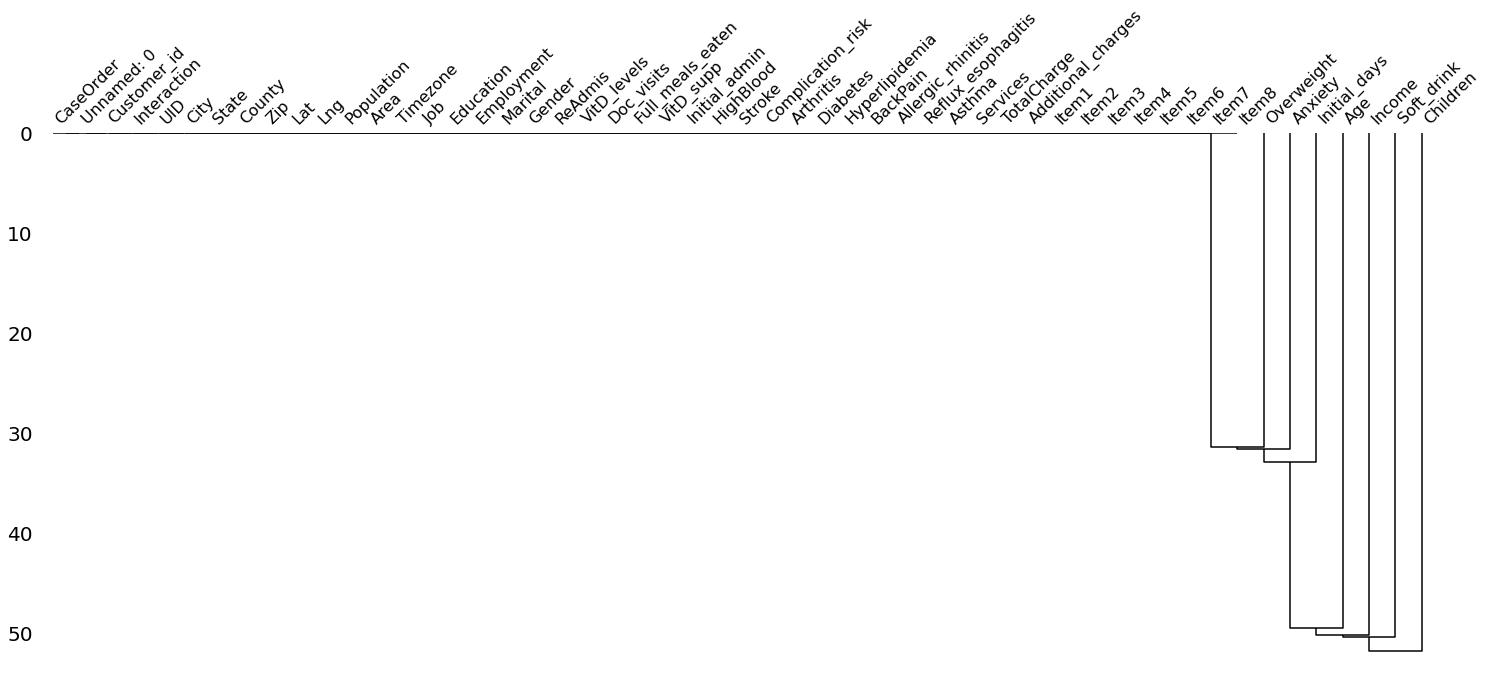

Signature:
msno.dendrogram(
    df,
    method='average',
    filter=None,
    n=0,
    p=0,
    orientation=None,
    figsize=None,
    fontsize=16,
    inline=False,
    ax=None,
)
Docstring:
Fits a `scipy` hierarchical clustering algorithm to the given DataFrame's variables and visualizes the results as
a `scipy` dendrogram.

The default vertical display will fit up to 50 columns. If more than 50 columns are specified and orientation is
left unspecified the dendrogram will automatically swap to a horizontal display to fit the additional variables.

:param df: The DataFrame whose completeness is being dendrogrammed.
:param method: The distance measure being used for clustering. This is a parameter that is passed to
`scipy.hierarchy`.
:param filter: The filter to apply to the heatmap. Should be one of "top", "bottom", or None (default).
:param n: The cap on the number of columns to include in the filtered DataFrame.
:param p: The cap on the percentage fill of the columns in the filter

In [49]:
msno.dendrogram?
msno.dendrogram(df, orientation='bottom')

In [50]:
# Verify these columns are the same, if so drop the "Unnamed: 0" column
df[df["Unnamed: 0"] != df["CaseOrder"]]
# df.drop("Unnamed: 0", 1)

Empty DataFrame
Columns: [Unnamed: 0, CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, VitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []

In [51]:
df[["Unnamed: 0", "CaseOrder"]].describe()

Unnamed: 0    CaseOrder
count  10000.00000  10000.00000
mean    5000.50000   5000.50000
std     2886.89568   2886.89568
min        1.00000      1.00000
25%     2500.75000   2500.75000
50%     5000.50000   5000.50000
75%     7500.25000   7500.25000
max    10000.00000  10000.00000

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'CaseOrder'}>]], dtype=object)

Text(0.5, 0, 'X')

Text(0, 0.5, 'Y')

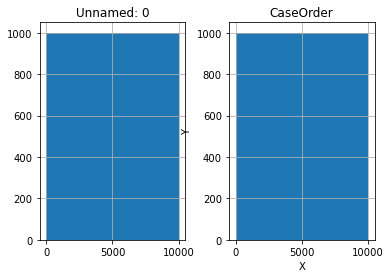

In [52]:
pd.DataFrame.hist(df[["Unnamed: 0", "CaseOrder"]])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [53]:
# convert categorical string values to category data type
# df["Employment"] = df["Employment"].astype("category")

df["Soft_drink"].unique() # > [nan, 'No', 'Yes']
# convert "Soft_drink" nan's to 'No'
df.loc[df["Soft_drink"].isna(), "Soft_drink"] = "No"
# validate a value exists for each row
assert len(df["Soft_drink"].isna().index) == len(df.index)

# df[df["Soft_drink"] == np.nan]

for col in ["Employment", "Marital", "Gender", "ReAdmis", "Soft_drink", "Initial_admin", "HighBlood", "Stroke", "Complication_risk", "Arthritis", "Diabetes", "Hyperlipidemia","BackPain", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma", "Services"]:
    print(f"Converting feature '{col}' to 'category' data type")
    # report categorical counts     
    print(df[col].value_counts(), end="\n\n")

    # convert column to a category
    df = df.astype({col: "category"})

    # confirm the values successfully converted     
    assert df[col].dtype == "category"

# df["Soft_drink"].unique()
# df.groupby("Soft_drink").size()

array([nan, 'No', 'Yes'], dtype=object)

Converting feature 'Employment' to 'category' data type
Full Time     6029
Student       1017
Part Time      991
Unemployed     983
Retired        980
Name: Employment, dtype: int64

Converting feature 'Marital' to 'category' data type
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64

Converting feature 'Gender' to 'category' data type
Female                  5018
Male                    4768
Prefer not to answer     214
Name: Gender, dtype: int64

Converting feature 'ReAdmis' to 'category' data type
No     6331
Yes    3669
Name: ReAdmis, dtype: int64

Converting feature 'Soft_drink' to 'category' data type
No     8056
Yes    1944
Name: Soft_drink, dtype: int64

Converting feature 'Initial_admin' to 'category' data type
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

Converting feature 'HighBlood' to 'category' data type
N

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb79a8febb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb79a8fb1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7bcb219d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7bcb39d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7bcb393a0>],
 'means': []}

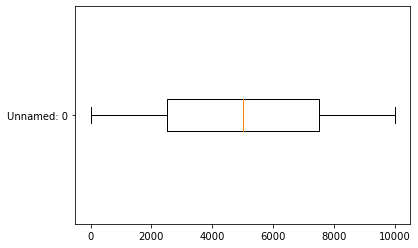

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7894181f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb789418910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb78940ae20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb789423070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb789423400>],
 'means': []}

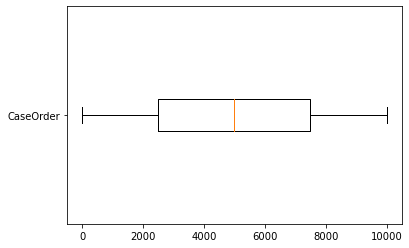

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7bd2d5430>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7bd2d5b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7bd2d50a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7bd2e0280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7bd2e0610>],
 'means': []}

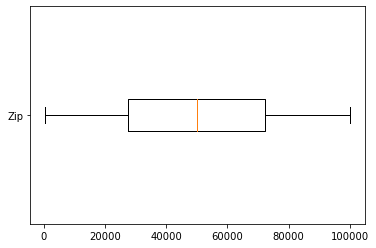

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7bd626a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb79abcc160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7bd626670>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb79abcc880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb79abccc10>],
 'means': []}

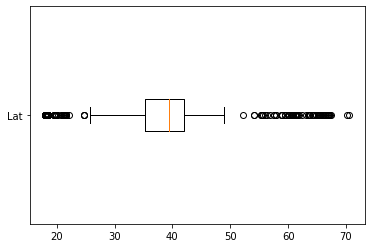

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7bcd98430>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7bcd98b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7bcd980a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7bcda72b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7bcda7640>],
 'means': []}

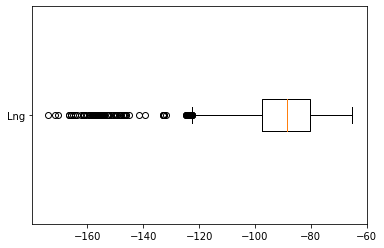

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb79ac46e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb78955d580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb79ac46a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb78955dca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb789569070>],
 'means': []}

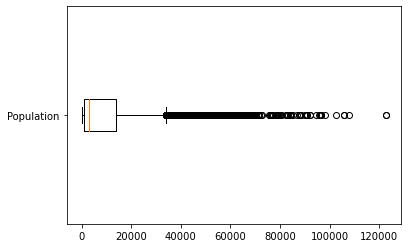

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb789516ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb789526640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb789516b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb789526d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7bcdbc130>],
 'means': []}

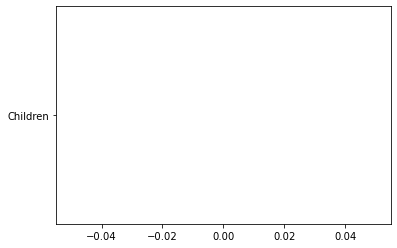

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7bda2c370>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7bda2ca90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7bda1ffa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7bda3a1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7bda3a580>],
 'means': []}

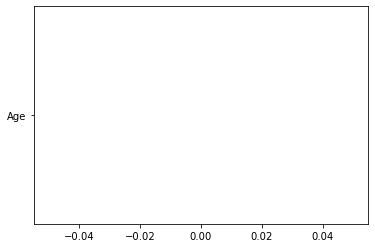

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7897137c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb789713ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb789713430>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7bcdf9640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7bcdf99d0>],
 'means': []}

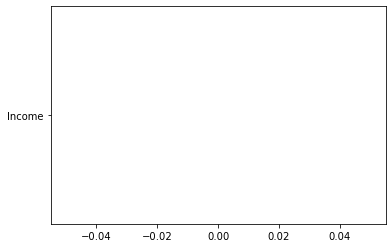

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7bce4ebe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7bce5c340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7bce4e850>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7bce5ca60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7bce5cdf0>],
 'means': []}

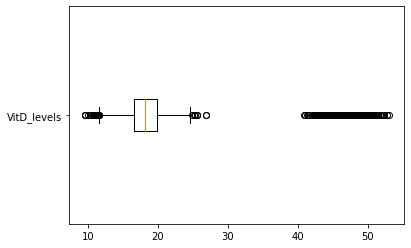

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7895fb070>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7895fb790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7bda8cca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7895fbeb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb789608280>],
 'means': []}

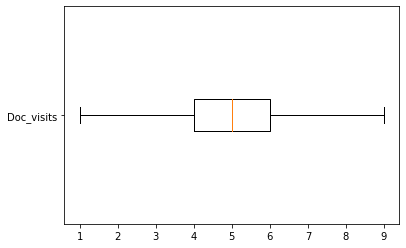

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7bdb3cc70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7bdb4c3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7bdb3c8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7bdb4caf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7bdb4ce80>],
 'means': []}

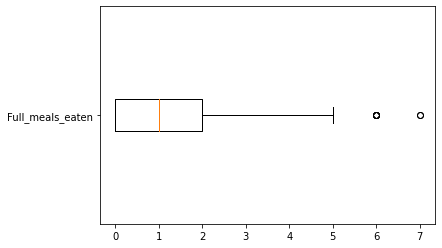

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb79adbb2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb79adbb9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb79adaaee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb79adc7130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb79adc74c0>],
 'means': []}

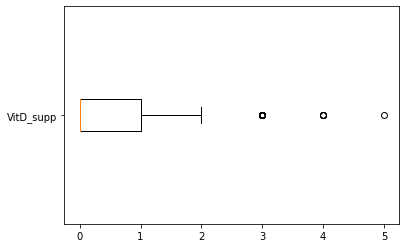

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb79ac7fc70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb79ac8f3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb79ac7f8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb79ac8fac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb79ac8fe50>],
 'means': []}

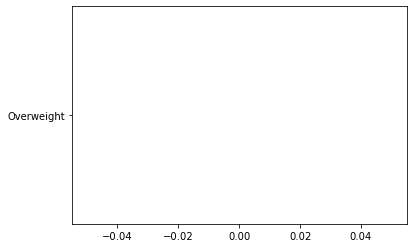

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7bd3f7160>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7bd3f7880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7bd3e6dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7bd3f7fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7bd402370>],
 'means': []}

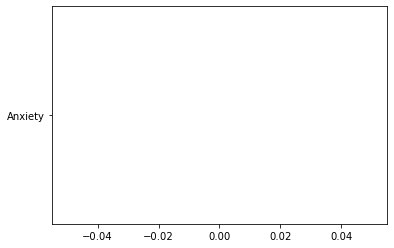

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7a98ff5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7a98ffd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7a98ff250>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7a9909460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7a99097f0>],
 'means': []}

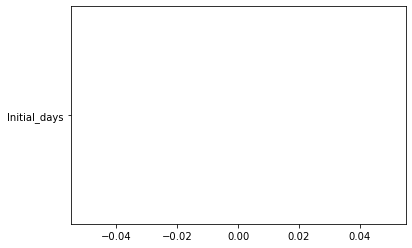

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7a995ca00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7a996c160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7a995c670>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7a996c880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7a996cc10>],
 'means': []}

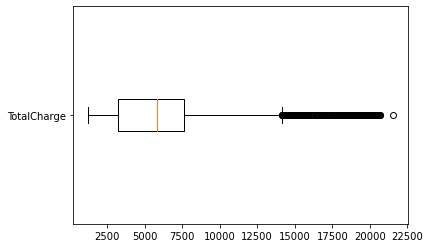

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb79ae795b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb79ae79cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb79ae79220>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb79ae85430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb79ae857c0>],
 'means': []}

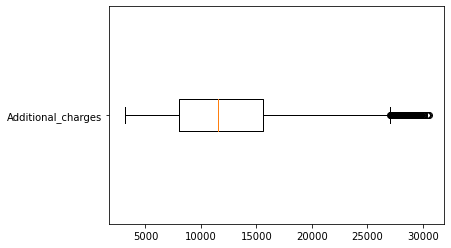

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb79aed5f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb79aee46d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb79aed5be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb79aee4df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb79aef11c0>],
 'means': []}

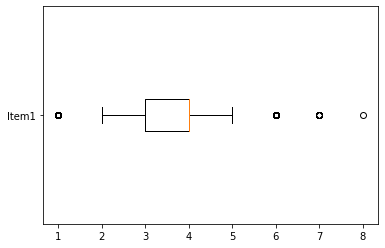

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7bd49c5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7bd49ccd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7bd49c220>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7bd4a8430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7bd4a87c0>],
 'means': []}

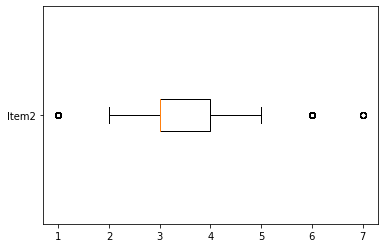

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7bd423640>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7bd423d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7bd4232b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7bd4314c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7bd431850>],
 'means': []}

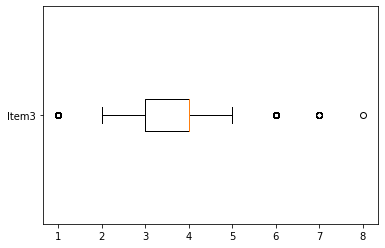

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb79afb7ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb79b025400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb79afb7910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb79b025b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb79b025eb0>],
 'means': []}

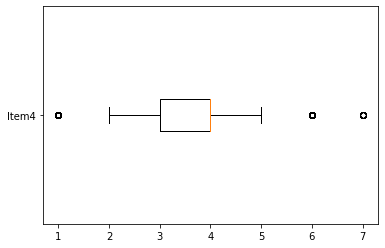

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb78988ed00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb78989f460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb78988e970>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb78989fb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb78989ff10>],
 'means': []}

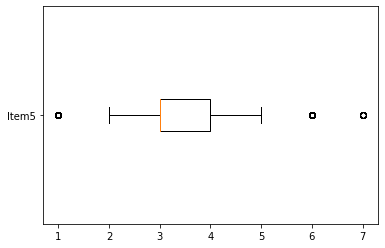

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7bd47f5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7bd47fac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7bd47f040>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7bd4a8c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7bd4a8160>],
 'means': []}

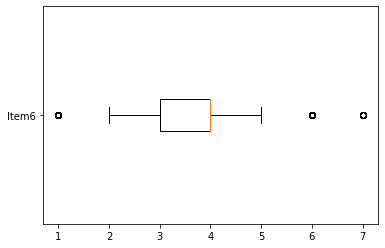

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb79ae85e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb79ae85880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb79ae85c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb79ae6af10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb79ae6adf0>],
 'means': []}

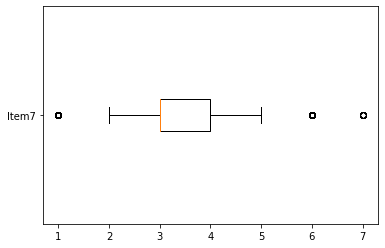

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7a9923040>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7bd376280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7a9923fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7bd376ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7bd376190>],
 'means': []}

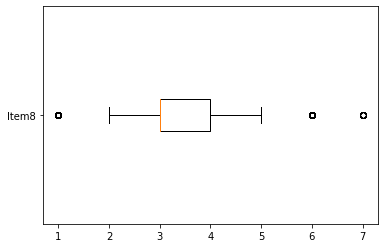

In [54]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.boxplot(df[col], labels=[col], vert=False)
    plt.show()

# Part III: Data Cleaning
---

## D1: Cleaning Findings

In [776]:
df = pd.read_csv(filename)
treated_df = df.copy()

### Duplicate Treatment

In [777]:
treated_df = treated_df.drop_duplicates(subset=['Customer_id', 'Interaction', 'UID'])
assert treated_df.duplicated(subset=['Customer_id', 'Interaction', 'UID']).sum() == 0

### Missing Value Treatment

In [778]:
null_df = treated_df.isnull().sum()
null_counts_df = null_df[null_df > 0].sort_values(ascending=False)

# store the list of column names with missing values
missing_cols = null_counts_df.index

null_counts_df

Children        2588
Soft_drink      2467
Income          2464
Age             2414
Initial_days    1056
Anxiety          984
Overweight       982
dtype: int64

#### Children Imputation Comps

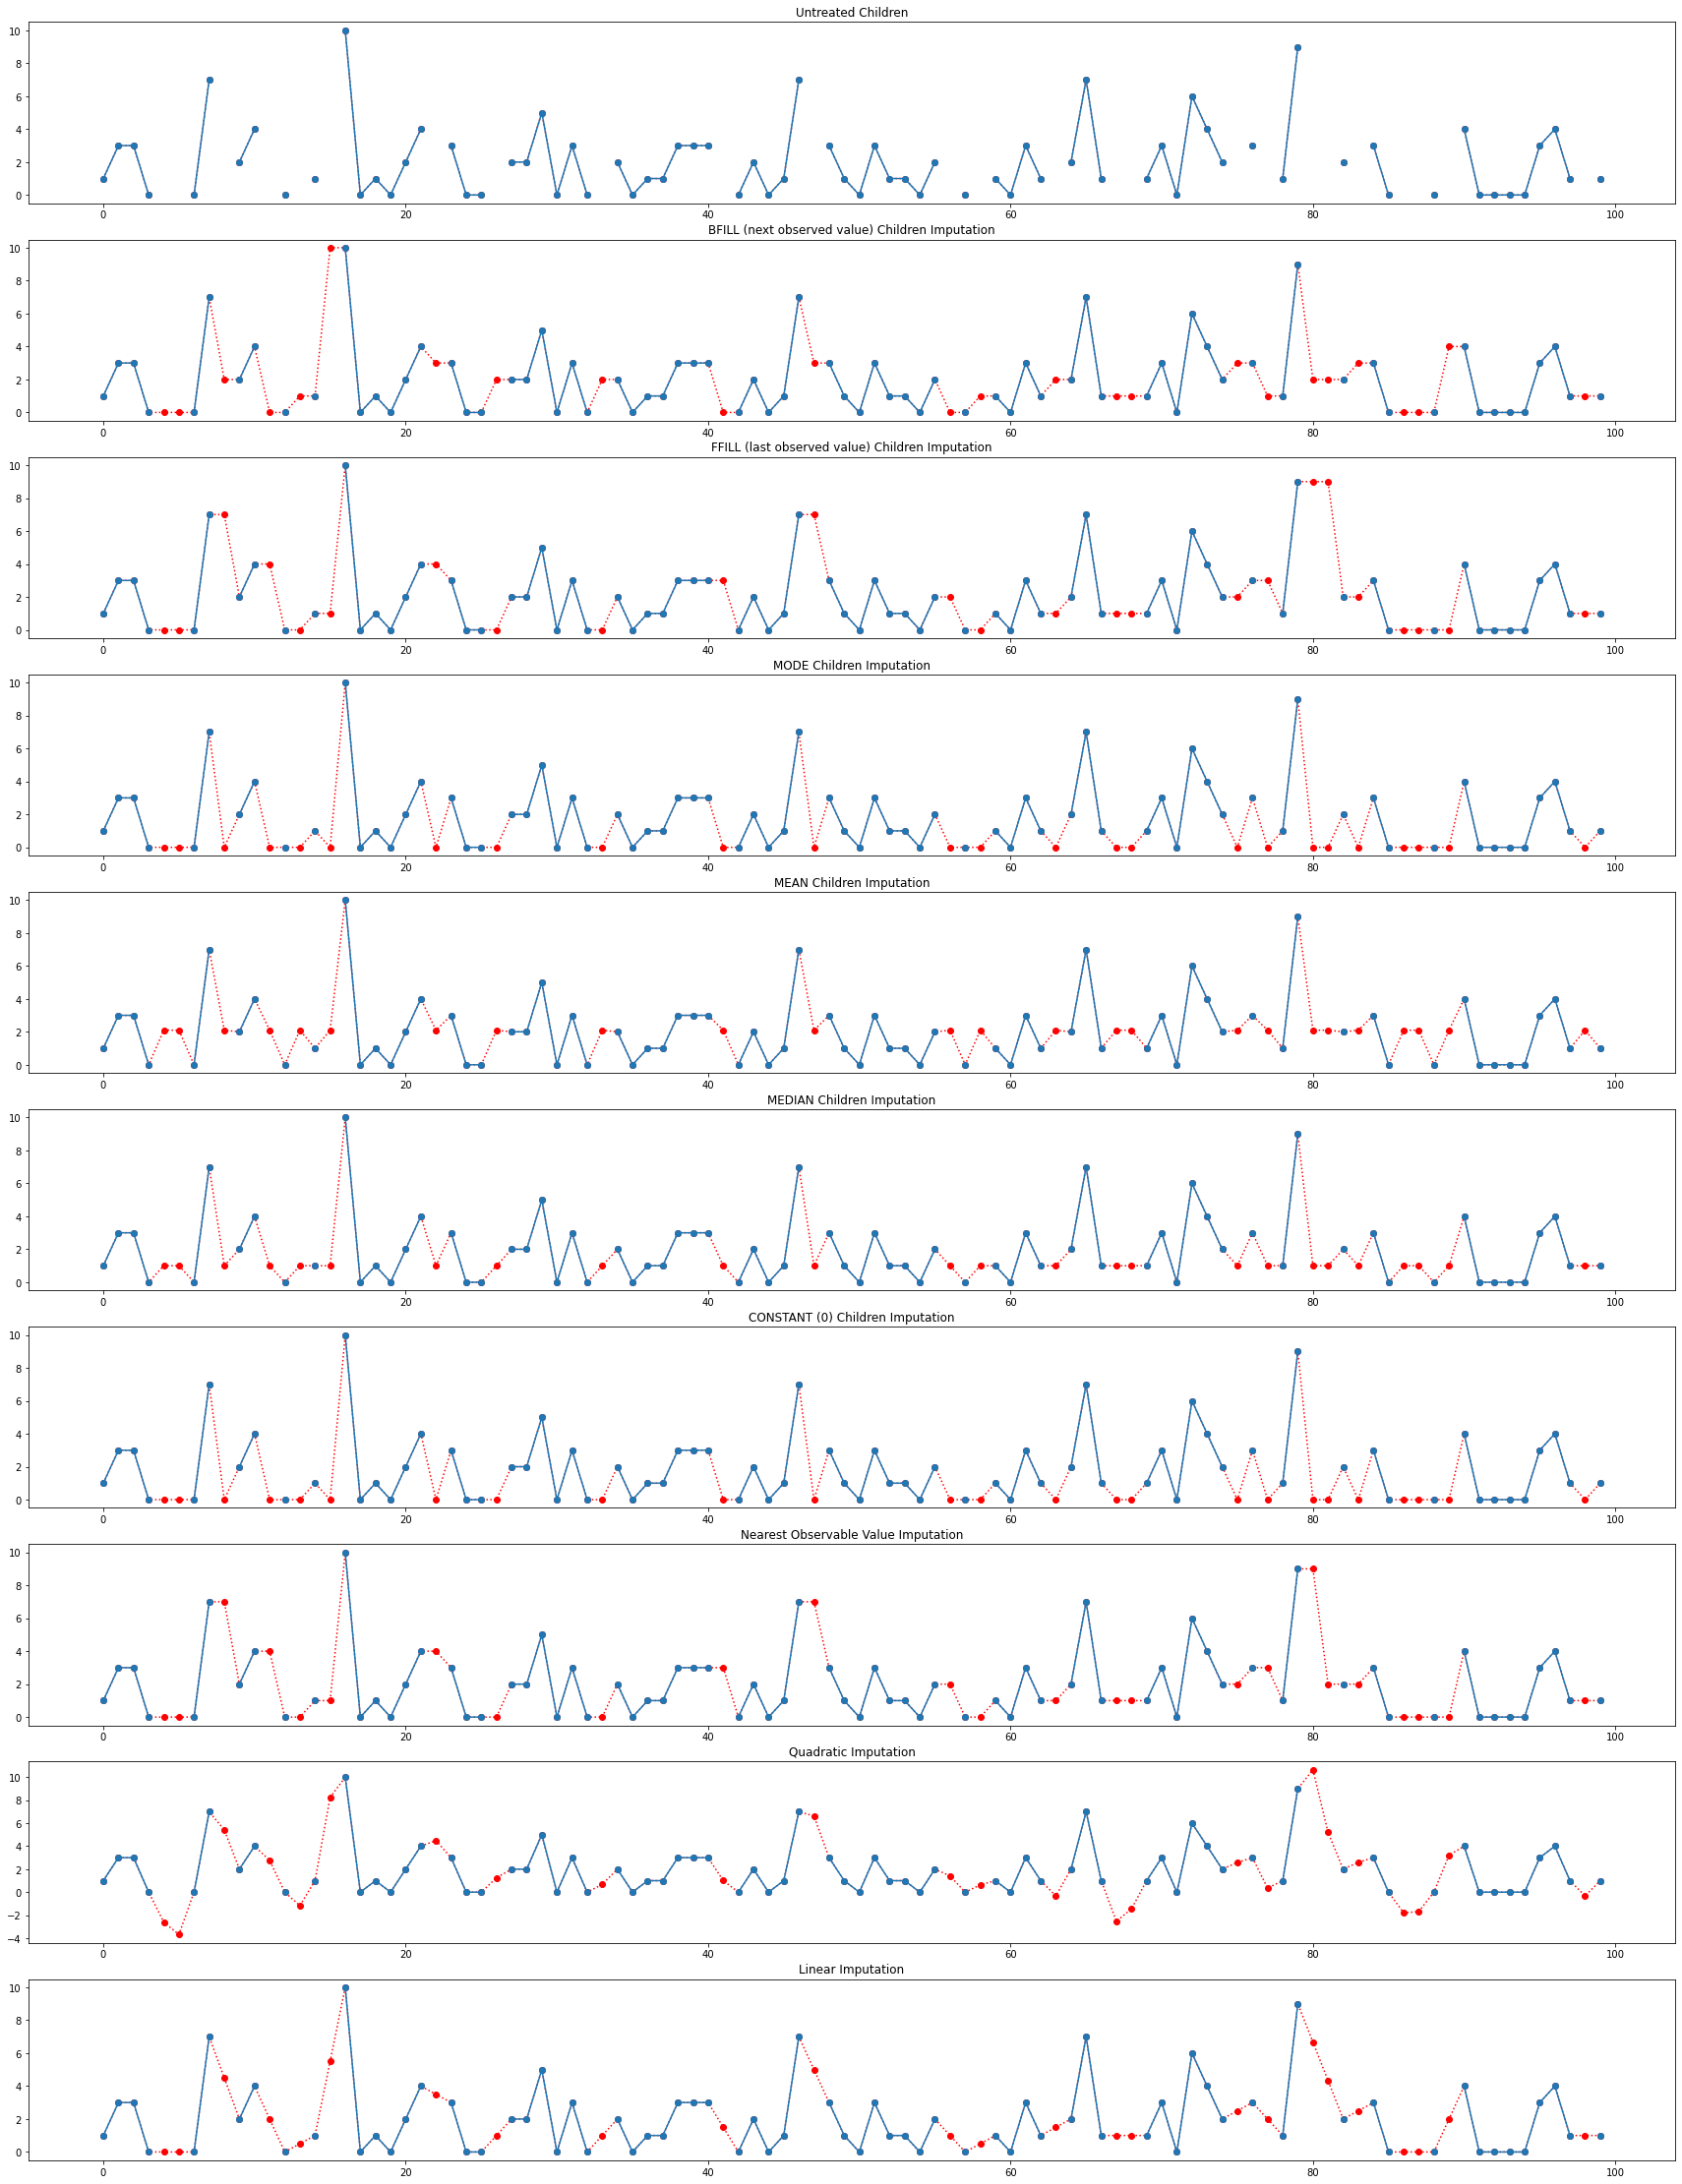

In [779]:
n = 100
col = 'Children'
imp_df = df[col].head(n)

imputations = {
    f'Untreated {col}': imp_df,
    f'BFILL (next observed value) {col} Imputation': imp_df.fillna(method='bfill'),
    f'FFILL (last observed value) {col} Imputation': imp_df.fillna(method='ffill'),    
    f'MODE {col} Imputation': imp_df.fillna(df[col].mode()[0]),
    f'MEAN {col} Imputation': imp_df.fillna(df[col].mean()),
    f'MEDIAN {col} Imputation': imp_df.fillna(df[col].median()),
    f'CONSTANT (0) {col} Imputation': imp_df.fillna(0),
    f'Nearest Observable Value Imputation': imp_df.interpolate(method='nearest'),
    f'Quadratic Imputation': imp_df.interpolate(method='quadratic'),
    f'Linear Imputation': imp_df.interpolate(method='linear'),    
}

fig, axes = plt.subplots(len(imputations), 1, figsize=(30, 40))

for ax, (k, v) in zip(axes, imputations.items()):
    _ = v.plot(title=k, color='red', marker='o', linestyle='dotted', ax=ax)
    _ = df[col].head(n).plot(marker='o', ax=ax)

#### Age Imputation Comps

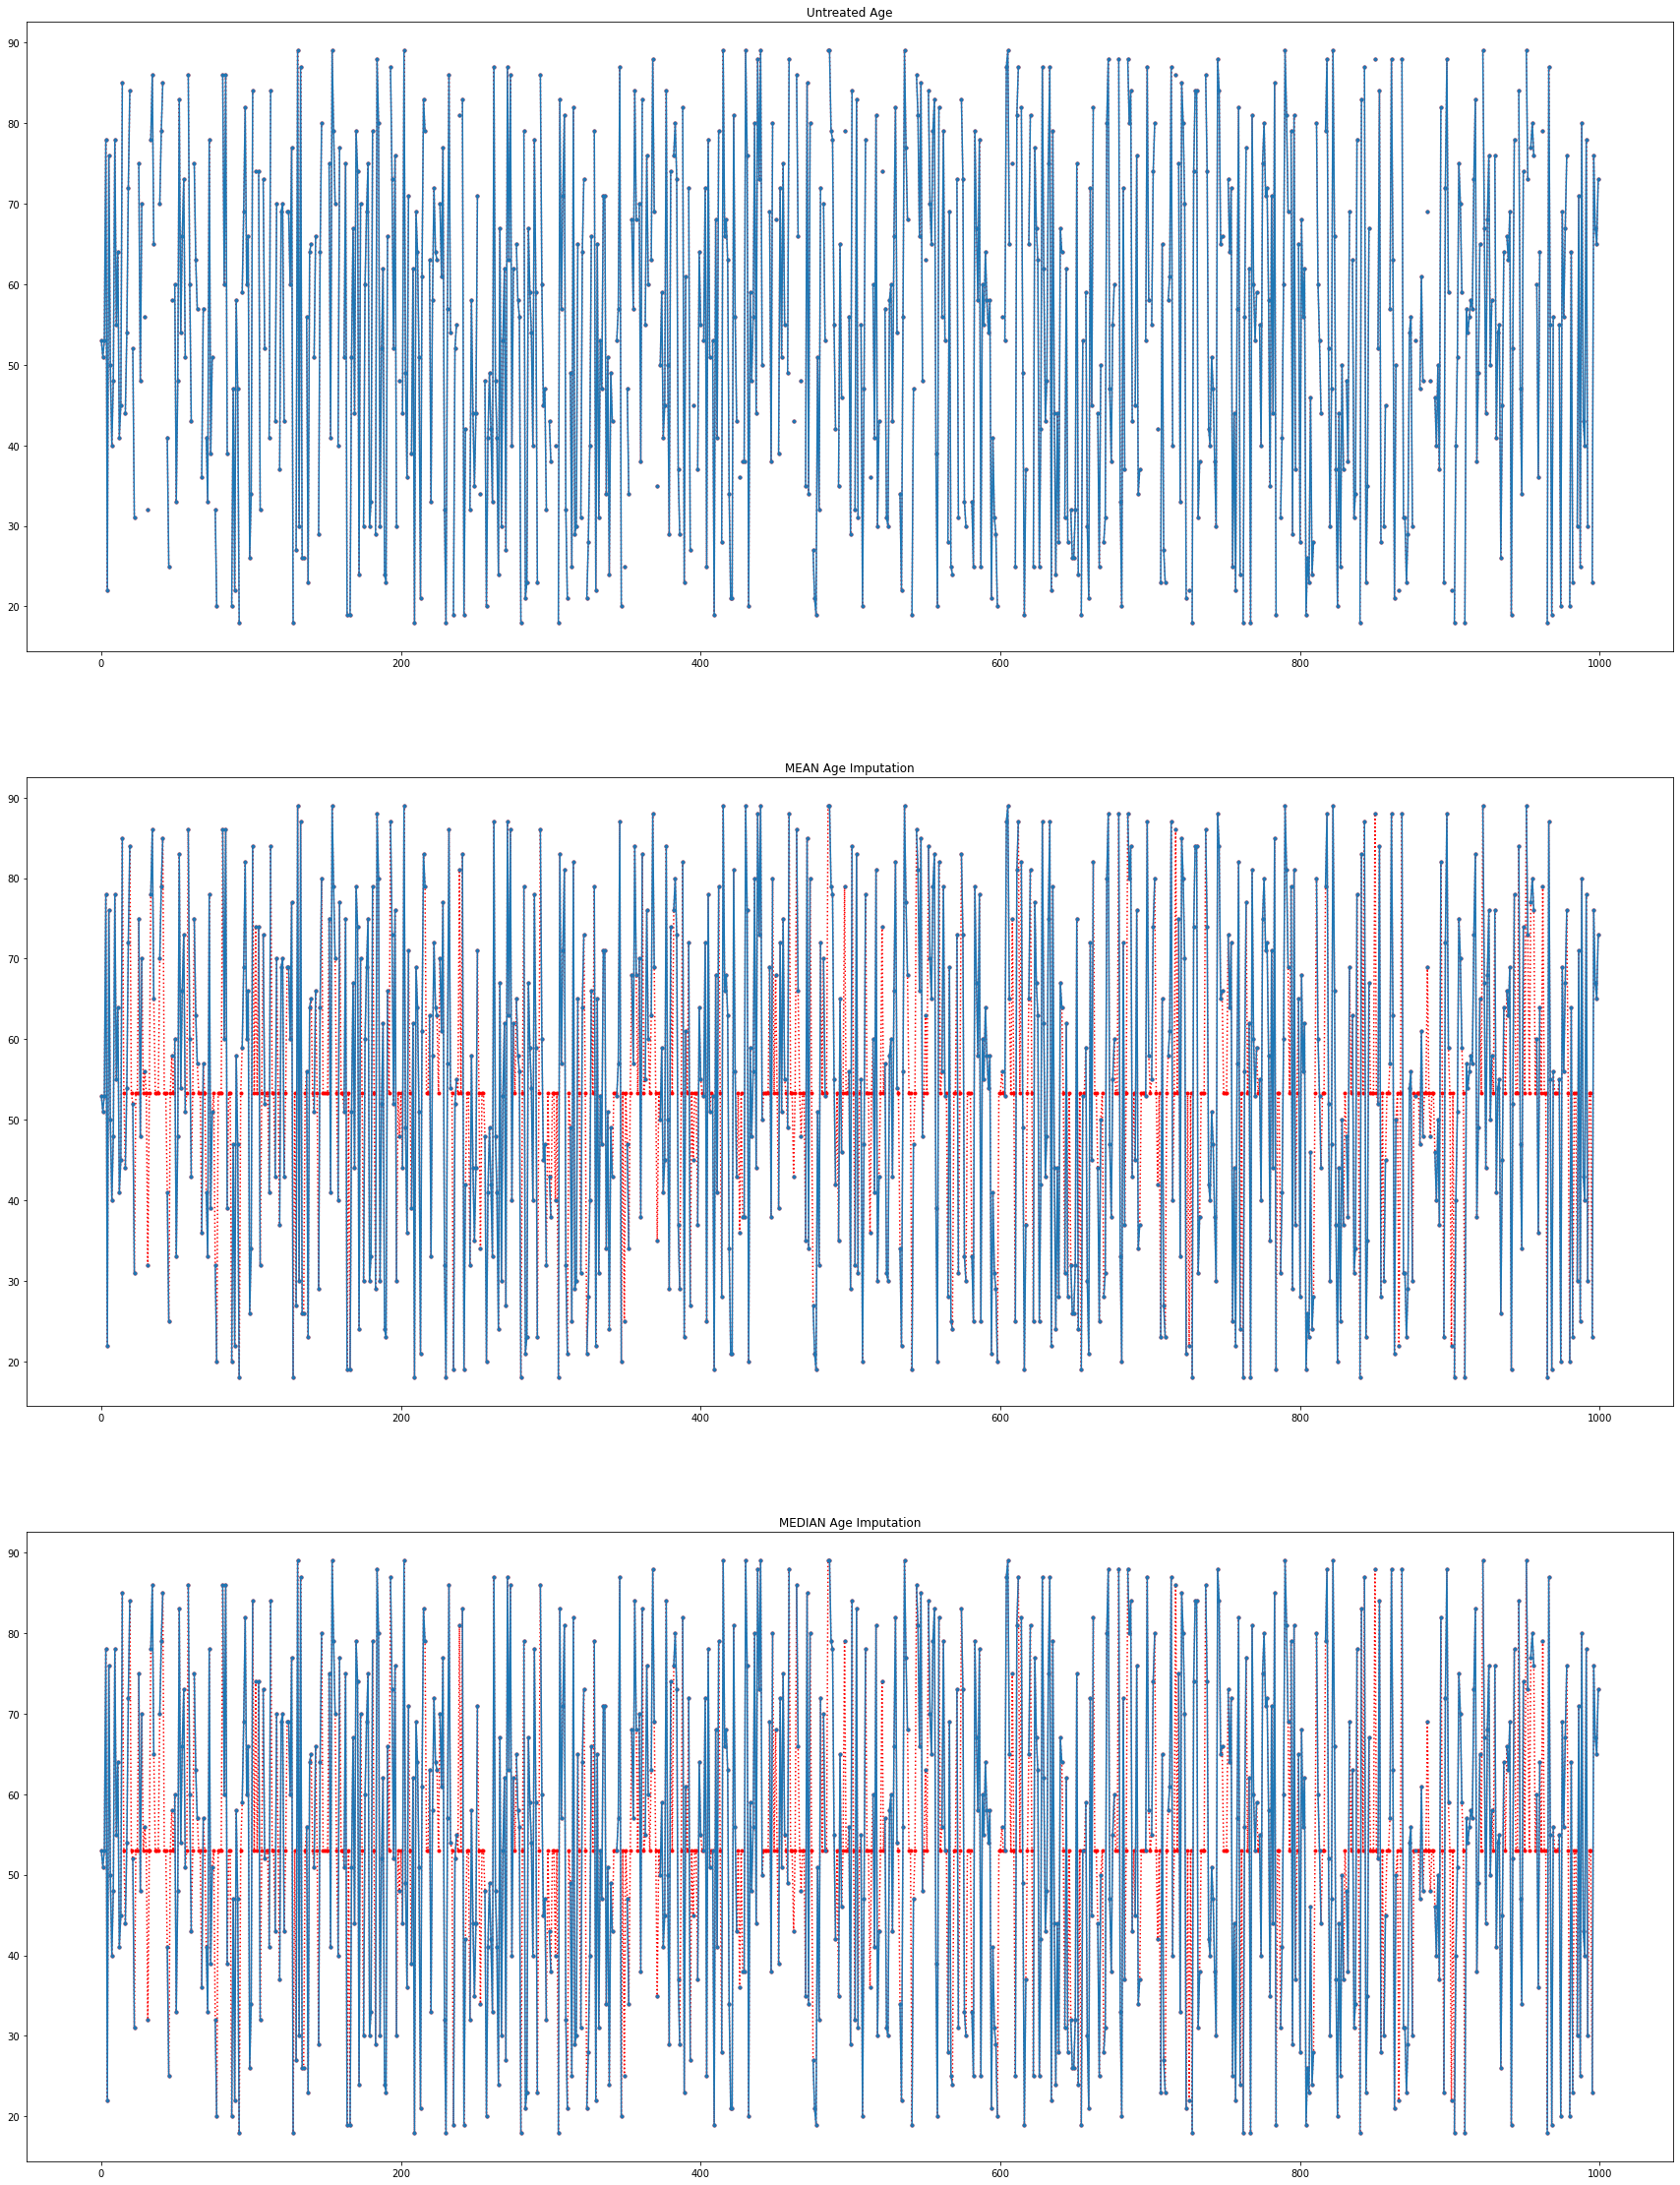

In [780]:
n = 1000
col = 'Age'
imp_df = df[col].head(n)

imputations = {  
    f'Untreated {col}': imp_df,
    f'MEAN {col} Imputation': imp_df.fillna(df[col].mean()),    
    f'MEDIAN {col} Imputation': imp_df.fillna(df[col].median()),
}

fig, axes = plt.subplots(len(imputations), 1, figsize=(30, 40))

for ax, (k, v) in zip(axes, imputations.items()):
    _ = v.plot(title=k, color='red', marker='.', linestyle='dotted', ax=ax)
    _ = df[col].head(n).plot(marker='.', ax=ax)

#### Initial_days Imputation Comps

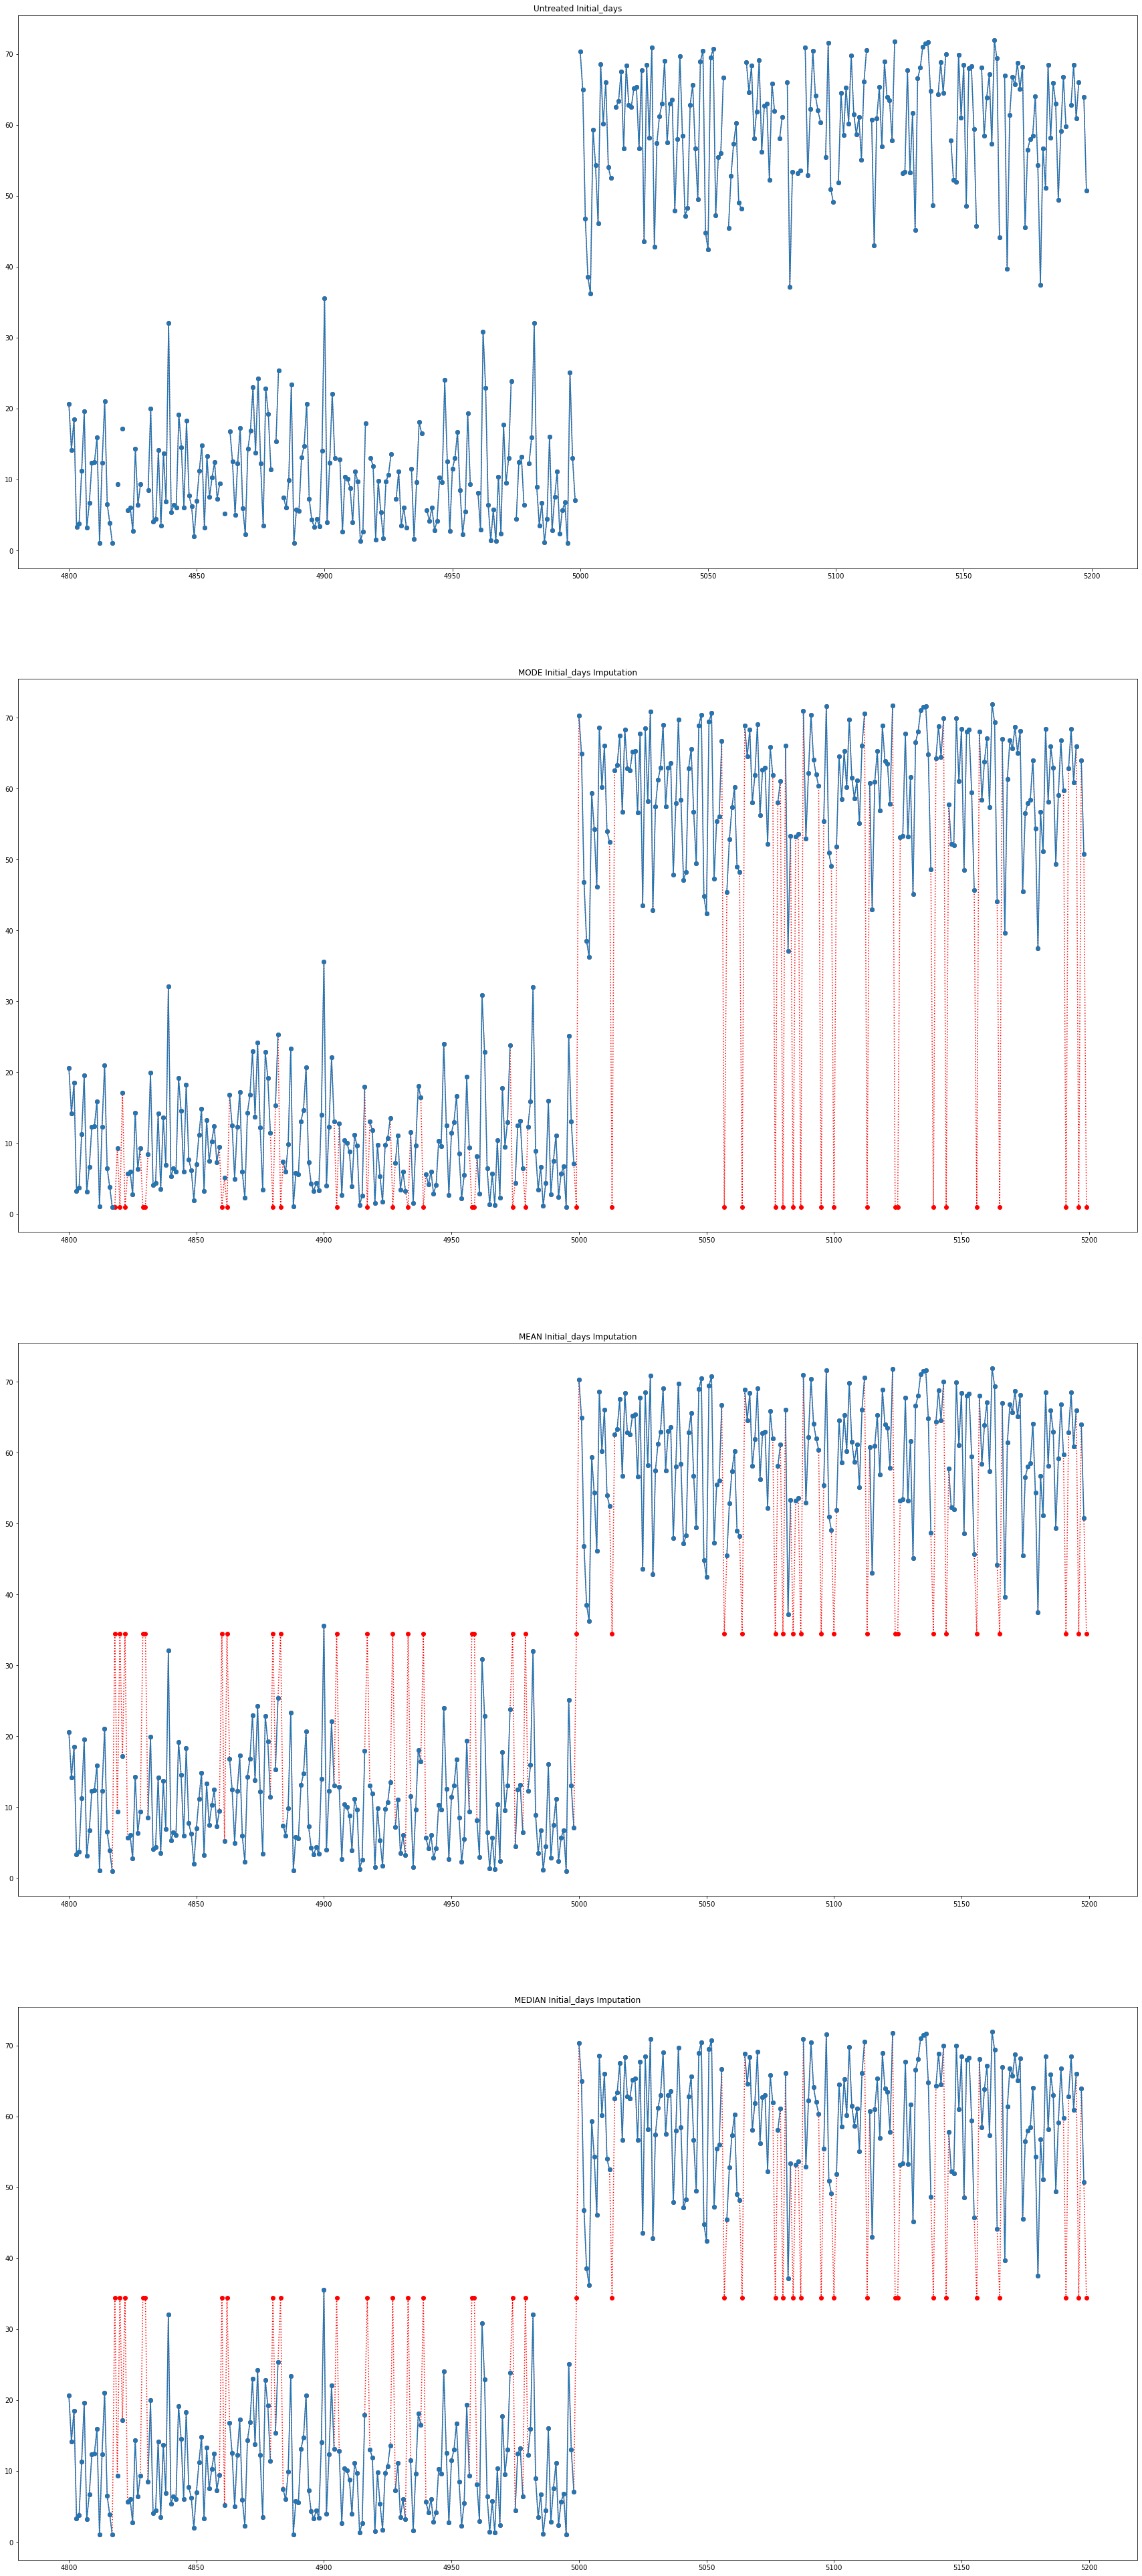

In [781]:
col = 'Initial_days'
rows = range(4800,5200)
imp_df = df[col].loc[rows]

imputations = {  
    f'Untreated {col}': imp_df,
    f'MODE {col} Imputation': imp_df.fillna(df[col].mode()[0]),
    f'MEAN {col} Imputation': imp_df.fillna(df[col].mean()),    
    f'MEDIAN {col} Imputation': imp_df.fillna(df[col].median()),
}

fig, axes = plt.subplots(len(imputations), 1, figsize=(30, 70))

for ax, (k, v) in zip(axes, imputations.items()):
    _ = v.plot(title=k, color='red', marker='o', linestyle='dotted', ax=ax)
    _ = df[col].loc[rows].plot(marker='o', ax=ax)

#### Imputations

In [785]:
# uniform and multimodal distributions (mean)    
for col in ["Age", "Initial_days"]:
    treated_df[col] = df[col].fillna(df[col].mean())
    
# skewed distributions (median)    
for col in ["Income"]: 
    treated_df[col] = df[col].fillna(df[col].median())
    
# binomial distributions (mode)    
for col in ["Anxiety", "Overweight"]:
    treated_df[col] = df[col].fillna(df[col].mode()[0])

# Use Constant Value
treated_df.loc[treated_df["Soft_drink"].isnull(), ["Soft_drink"]] = 'No'
treated_df.loc[treated_df["Children"].isnull(), ["Children"]] = 0

### Verify Missing Value Imputation

In [1092]:
nan_df = treated_df.isnull().sum()

if nan_df.sum() != 0:
    raise AssertionError(f"NaN values still exist in the dataset\n{nan_df[nan_df > 0]}")

### Compare Treated and Untreated Data Summaries

Untreated Children  Treated Children
count         7412.000000      10000.000000
mean             2.098219          1.555200
std              2.155427          2.070744
min              0.000000          0.000000
25%              0.000000          0.000000
50%              1.000000          1.000000
75%              3.000000          3.000000
max             10.000000         10.000000

Untreated Soft_drink Treated Soft_drink
count                  7533              10000
unique                    2                  2
top                      No                 No
freq                   5589               8056

Untreated Income  Treated Income
count       7536.000000    10000.000000
mean       40484.438268    38872.450471
std        28664.861050    25042.796229
min          154.080000      154.080000
25%        19450.792500    23956.162500
50%        33942.280000    33942.280000
75%        54075.235000    46466.797500
max       207249.130000   207249.130000

Untreated Age   Treated Age
count    7586.000000  10000.000000
mean       53.295676     53.295676
std        20.659182     17.993375
min        18.000000     18.000000
25%        35.000000     41.000000
50%        53.000000     53.295676
75%        71.000000     65.000000
max        89.000000     89.000000

Untreated Initial_days  Treated Initial_days
count             8944.000000          10000.000000
mean                34.432082             34.432082
std                 26.287050             24.860232
min                  1.001981              1.001981
25%                  7.911709              8.928987
50%                 34.446941             34.432082
75%                 61.124654             59.459981
max                 71.981486             71.981486

Untreated Anxiety  Treated Anxiety
count        9016.000000     10000.000000
mean            0.322316         0.290600
std             0.467389         0.454062
min             0.000000         0.000000
25%             0.000000         0.000000
50%             0.000000         0.000000
75%             1.000000         1.000000
max             1.000000         1.000000

Untreated Overweight  Treated Overweight
count           9018.000000        10000.000000
mean               0.709137            0.737700
std                0.454186            0.439907
min                0.000000            0.000000
25%                0.000000            0.000000
50%                1.000000            1.000000
75%                1.000000            1.000000
max                1.000000            1.000000

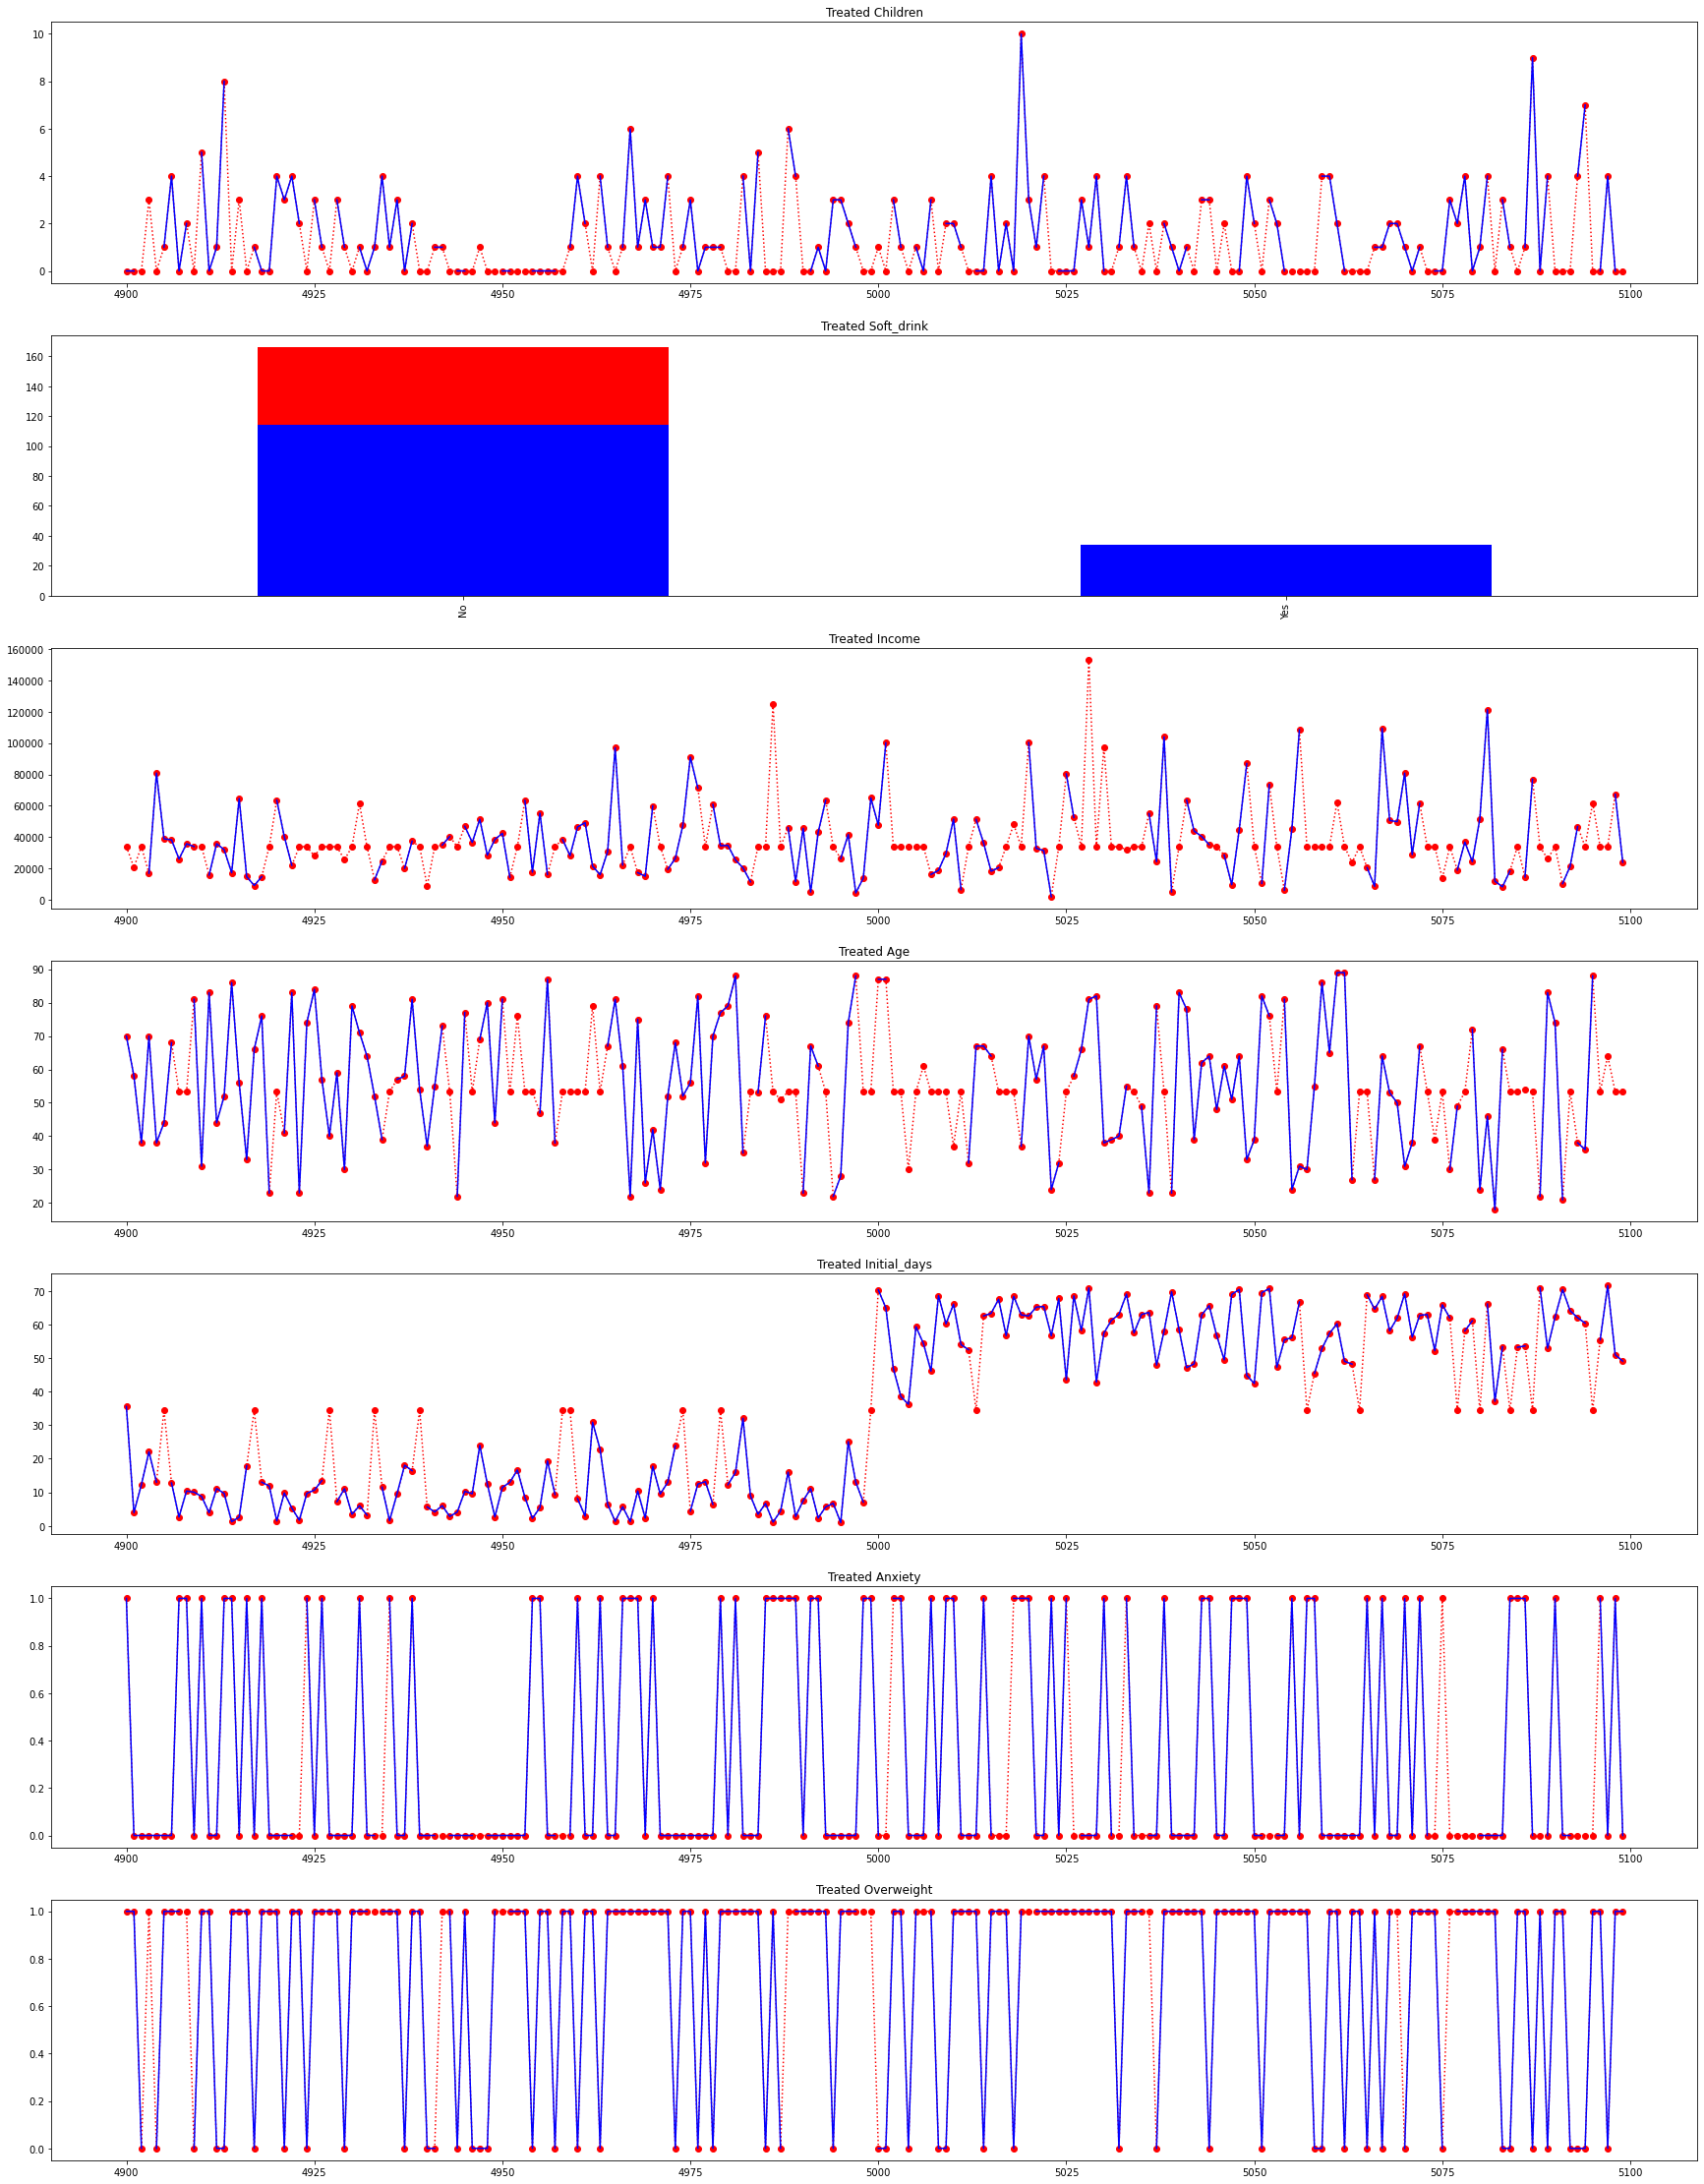

In [1093]:
fig, axes = plt.subplots(len(missing_cols), 1, figsize=(30, 40))
rows = range(4900,5100)

for ax, col in zip(axes, missing_cols):
    try:
        _ = treated_df[col].loc[rows].plot(title=f'Treated {col}', color='red', marker='o', linestyle='dotted', ax=ax)
        _ = df[col].loc[rows].plot(color='blue', ax=ax)
    except TypeError:
        # display non-numeric data in a bar chart
        _ = treated_df[col].loc[rows].value_counts().plot(title=f'Treated {col}', kind='bar', color='red', linestyle='dotted', ax=ax)
        _ = df[col].loc[rows].value_counts().plot(color='blue', kind='bar', ax=ax)
        pass # 
        
    # compare Treated and Untreated data descriptions
    pd.DataFrame({f'Untreated {col}': df[col].describe(), f'Treated {col}': treated_df[col].describe()})

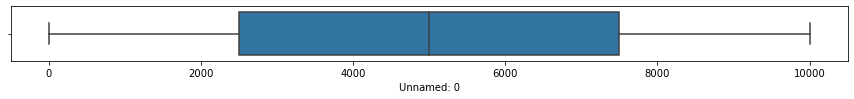

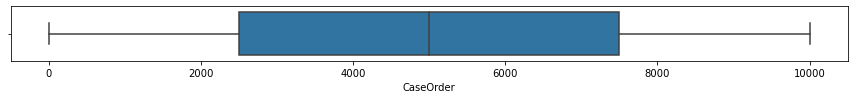

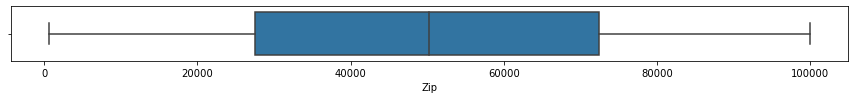

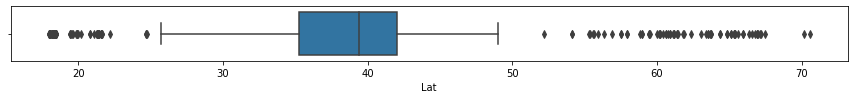

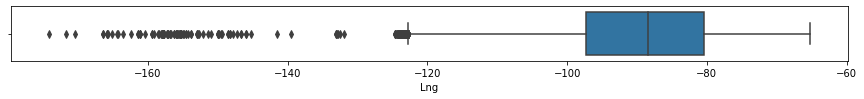

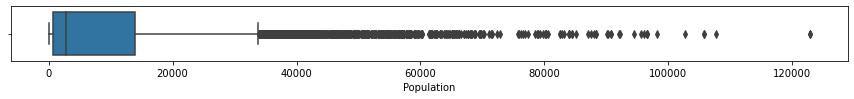

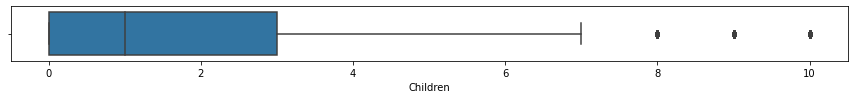

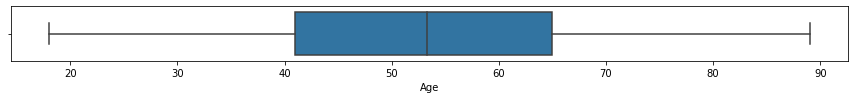

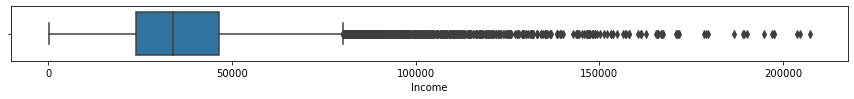

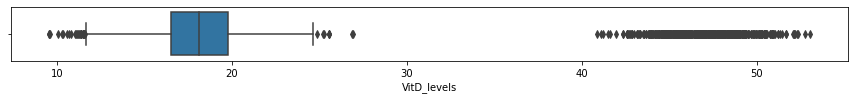

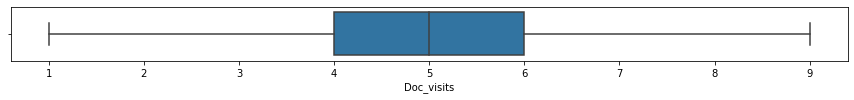

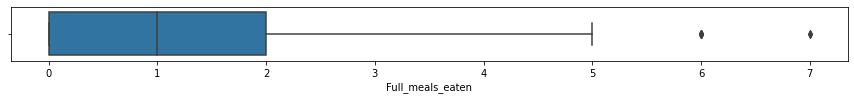

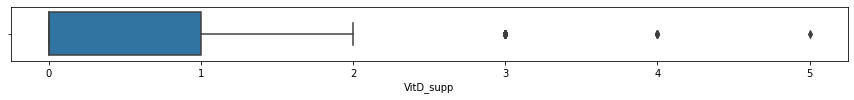

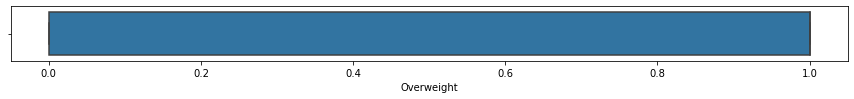

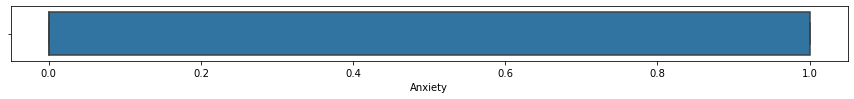

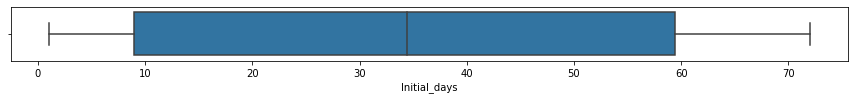

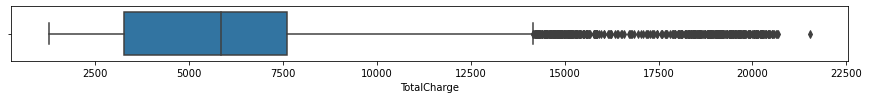

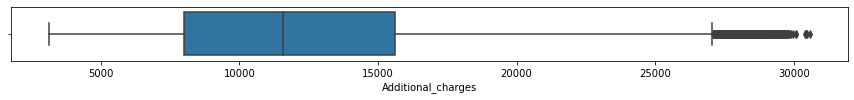

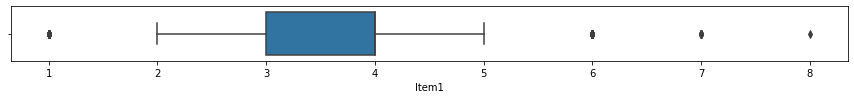

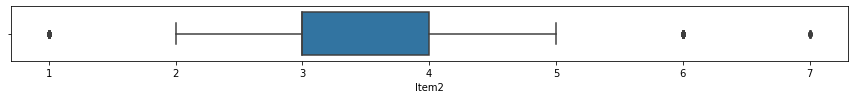

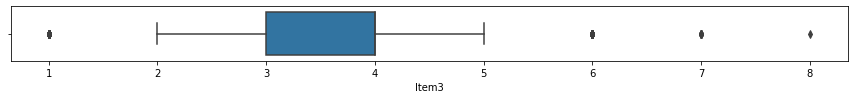

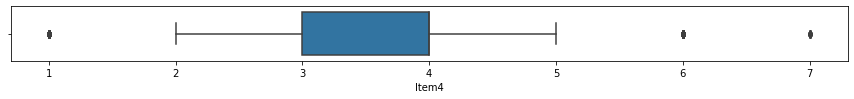

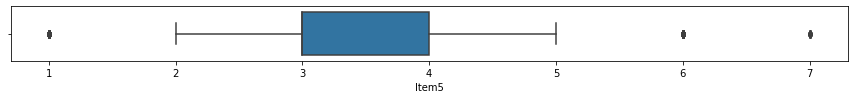

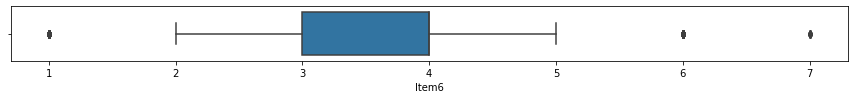

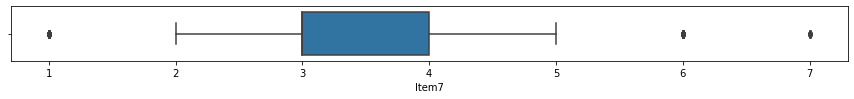

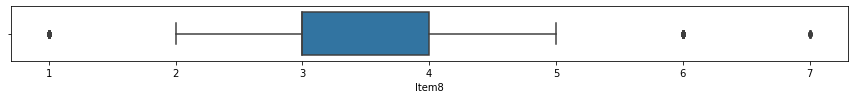

In [1094]:
# create_boxplots(df)
create_boxplots(treated_df)

### Outlier Treatment

In [1151]:
# numerical columns with notable outliers outliers are allowed on columns not listed here
z_score_cols = ['Children', 'VitD_levels', 'Full_meals_eaten', 'VitD_supp', 'TotalCharge', 'Additional_charges']

treated_df['Children'].value_counts()
# create_boxplots(df[z_score_cols])
# create_histograms(treated_df)    
# create_histograms(treated_df)
# treated_df[['VitD_levels', 'Gender']].round().sort_values(by='VitD_levels').value_counts()

pd.set_option('display.max_rows', None)


# display(treated_df[['VitD_levels', 'Gender', 'Age']].round().groupby(['Gender', 'Age']).agg(statistics).sort_values('VitD_levels'))
# counts()
# ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()


# round().sort_values(by='VitD_levels').value_counts()

0.0     4468
1.0     1858
3.0     1113
2.0     1094
4.0      739
8.0      157
7.0      154
6.0      145
5.0      126
9.0       83
10.0      63
Name: Children, dtype: int64

VitD_levels
471          50.0
2822         50.0
5121         49.0
9365         48.0
2503         47.0
7552         46.0
4171         45.0
2666         45.0
5951         43.0
5665         24.0
3693         24.0
1049         23.0
3631         23.0
1744         23.0
9963         23.0
4057         22.0
3780         22.0
9934         22.0
272          22.0
4555         22.0
2998         22.0
4353         22.0
297          22.0
2034         22.0
9436         22.0
8466         21.0
2575         21.0
7474         21.0
7324         21.0
6798         21.0
465          21.0
7293         21.0
6352         21.0
4024         21.0
6223         21.0
5982         21.0
4685         21.0
5764         21.0
5739         21.0
2211         21.0
5431         21.0
1533         21.0
1965         21.0
2007         20.0
2887         20.0
8543         20.0
6233         20.0
1386         20.0
1354         20.0
4277         20.0
6103         20.0
6953         20.0
3182         20.0
9857         20.0
7243         20.0
4608         20.0
1501         20.0
1428         20.0
7605         20.0
7733         20.0
8017         20.0
8364         20.0
5830         19.0
5040         19.0
5197         19.0
5581         19.0
930          19.0
5092         19.0
4204         19.0
5744         19.0
4965         19.0
9783         19.0
4935         19.0
4548         19.0
4964         19.0
9858         19.0
4610         19.0
4939         19.0
5836         19.0
1649         19.0
3870         19.0
5281         19.0
1982         19.0
2267         19.0
573          19.0
8133         19.0
2802         19.0
8692         19.0
7350         19.0
800          19.0
6740         19.0
9287         19.0
6404         19.0
3397         19.0
3479         19.0
3230         19.0
7008         18.0
8506         18.0
145          18.0
8495         18.0
8546         18.0
9955         18.0
7490         18.0
9577         18.0
8611         18.0
7363         18.0
9946         18.0
6373         18.0
9267         18.0
5902         18.0
5899         18.0
5432         18.0
1756         18.0
5269         18.0
4480         18.0
1802         18.0
3253         18.0
1229         18.0
1116         18.0
1651         18.0
4584         18.0
5178         18.0
967          18.0
944          18.0
491          18.0
2369         17.0
3460         17.0
8883         17.0
3149         17.0
19           17.0
3050         17.0
7163         17.0
7217         17.0
2563         17.0
6525         17.0
3045         17.0
3013         17.0
2997         17.0
8050         17.0
7575         17.0
6559         17.0
6499         17.0
7865         17.0
9491         17.0
889          17.0
286          17.0
55           17.0
789          17.0
9638         17.0
9613         17.0
9146         17.0
4606         17.0
9556         17.0
4615         17.0
6105         17.0
1593         17.0
6320         17.0
9364         17.0
588          17.0
7795         17.0
2120         16.0
2059         16.0
9440         16.0
8280         16.0
8679         16.0
8167         16.0
9930         16.0
508          16.0
1011         16.0
2803         16.0
5344         16.0
5591         16.0
3254         16.0
4936         16.0
4543         16.0
4237         16.0
4071         16.0
6234         16.0
3858         16.0
2851         16.0
6630         16.0
5866         16.0
5434         16.0
245          16.0
5466         16.0
7130         16.0
7361         16.0
7336         16.0
3075         16.0
7050         15.0
1708         15.0
5963         15.0
8325         15.0
9874         15.0
7028         15.0
3498         15.0
8988         15.0
2462         15.0
4690         15.0
6955         15.0
8556         15.0
1855         15.0
2934         15.0
5038         14.0
7916         14.0
1307         14.0
2863         14.0
9671         13.0
8027         13.0
9193         13.0
5867         12.0
414          12.0
5065         12.0
6919         12.0

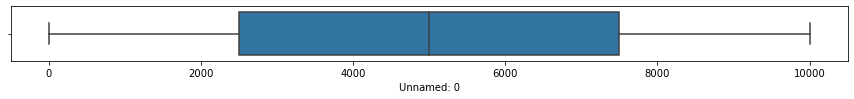

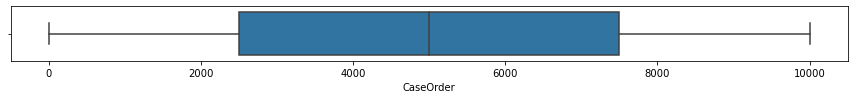

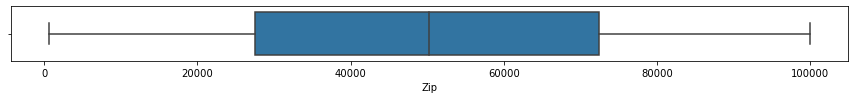

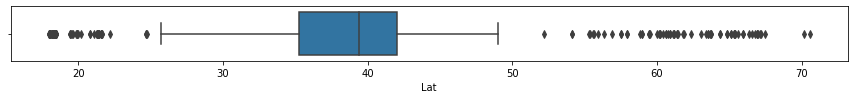

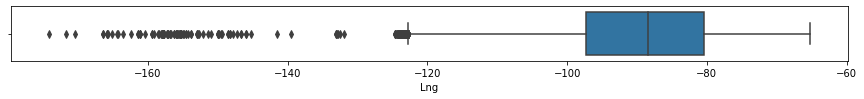

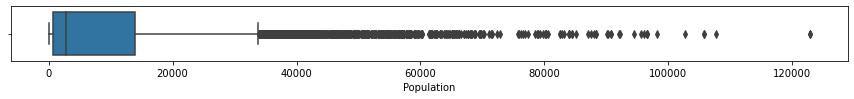

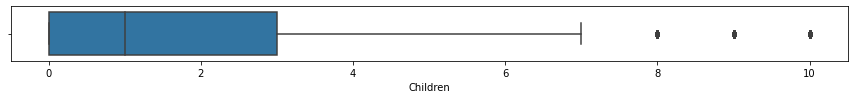

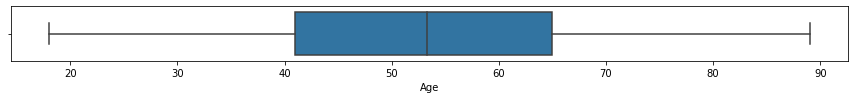

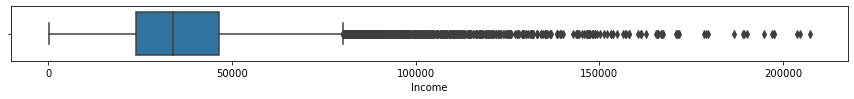

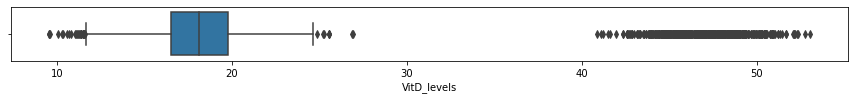

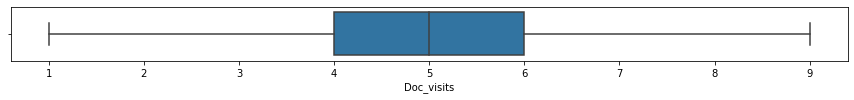

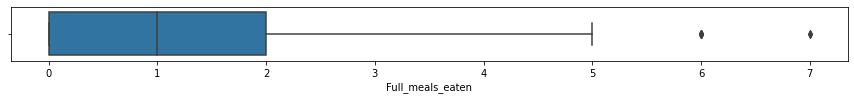

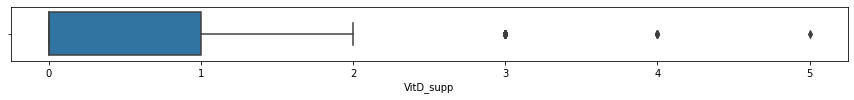

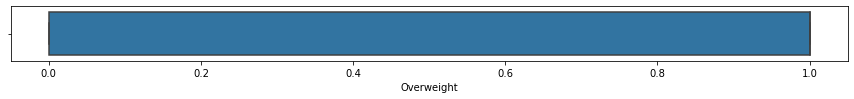

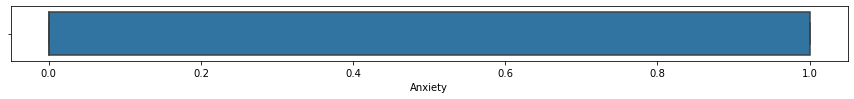

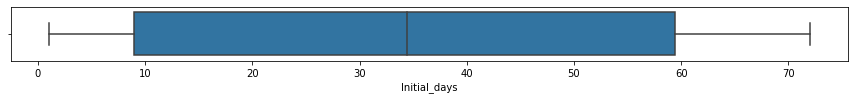

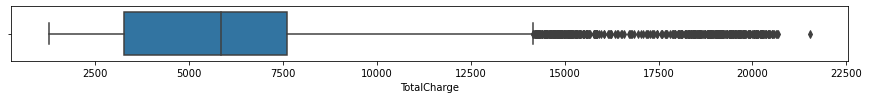

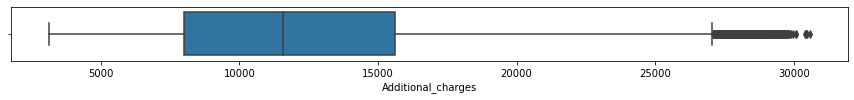

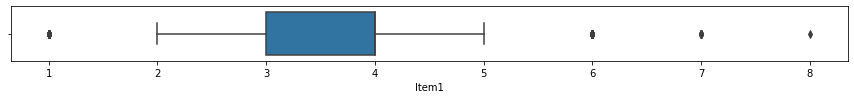

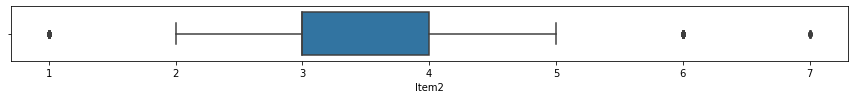

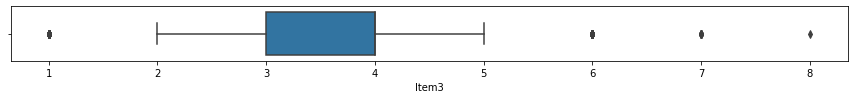

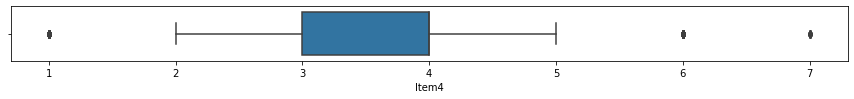

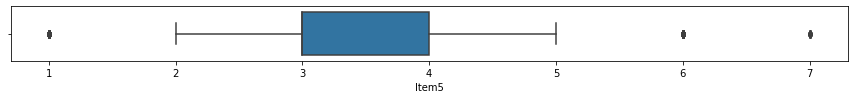

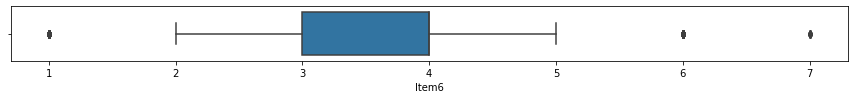

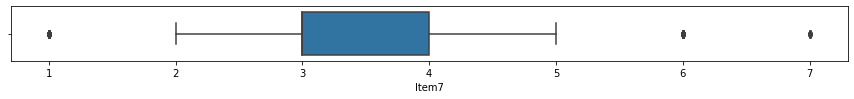

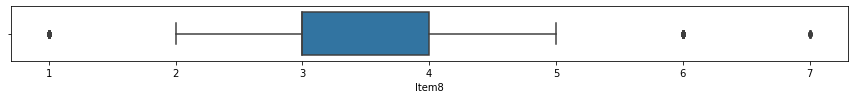

In [1108]:
create_boxplots(treated_df)    

#### VitD_levels Outlier Exploration

In [1223]:
# pd.set_option('display.max_rows', None)
# determine what correlation exists between Gender and VitD_levels
pd.DataFrame(treated_df[treated_df['Gender'] == 'Prefer not to answer'][['VitD_levels', 'Gender', 'Age']].round().sort_values(ascending=False, by=['VitD_levels', 'Age'])).head(10)

# determine what the average VitD_levels are by Gender and Age
treated_df[['VitD_levels', 'Gender', 'Age']].round().groupby(['Gender', 'Age']).agg({'VitD_levels': 'mean'}).sort_values('VitD_levels')

# determine what correlation exists between Gender and VitD_levels
vitd_df = df.copy()
vitd_df['Gender'] = df['Gender'].map({'Prefer not to answer': 0, 'Male': 1, 'Female': 2})
vitd_df.corr()['VitD_levels'].sort_values(ascending=False)

VitD_levels                Gender   Age
471          50.0  Prefer not to answer  85.0
2822         50.0  Prefer not to answer  55.0
5121         49.0  Prefer not to answer  22.0
9365         48.0  Prefer not to answer  53.0
2503         47.0  Prefer not to answer  36.0
7552         46.0  Prefer not to answer  86.0
4171         45.0  Prefer not to answer  65.0
2666         45.0  Prefer not to answer  24.0
5951         43.0  Prefer not to answer  53.0
3693         24.0  Prefer not to answer  62.0

VitD_levels
Gender               Age              
Prefer not to answer 74.0    15.000000
                     38.0    16.000000
                     20.0    16.000000
                     57.0    16.000000
                     87.0    16.000000
...                                ...
                     55.0    25.000000
                     24.0    27.666667
                     36.0    28.666667
                     65.0    45.000000
                     85.0    50.000000

[207 rows x 1 columns]

VitD_levels           1.000000
TotalCharge           0.728268
Age                   0.020097
Additional_charges    0.016369
Anxiety               0.014083
Item4                 0.012935
VitD_supp             0.010495
Full_meals_eaten      0.008691
Item6                 0.007654
Item8                 0.003871
Population            0.002510
Item7                 0.001861
Doc_visits            0.001482
Income                0.000162
Lng                  -0.000263
Initial_days         -0.001095
Unnamed: 0           -0.001661
CaseOrder            -0.001661
Children             -0.002041
Item1                -0.003945
Lat                  -0.004274
Overweight           -0.007684
Zip                  -0.008293
Gender               -0.011300
Item5                -0.011919
Item3                -0.012760
Item2                -0.017552
Name: VitD_levels, dtype: float64

#### Children Outlier Exploration

In [1227]:
df["Children"].astype('Int64').value_counts()
df["Children"].quantile(.99)

0     1880
1     1858
3     1113
2     1094
4      739
8      157
7      154
6      145
5      126
9       83
10      63
Name: Children, dtype: Int64

9.0

#### Full_meals_eaten Outlier Exploration

In [60]:
# # numerical columns with notable outliers
# z_score_cols = ['Children', 'VitD_levels', 'Full_meals_eaten', 'VitD_supp', 'TotalCharge', 'Additional_charges']

# zscore_df = df[z_score_cols].copy()

# for col in z_score_cols:
#     zscore_df[f"{col}_zscore"] = stats.zscore(df[col], nan_policy='omit')
#     # print values where their absolute values exceeds a z-score of > 3
#     zscore_df.loc[abs(zscore_df[f"{col}_zscore"]) > 3, [col, f"{col}_zscore"]]
    
# sorted(df["Children"].unique())
# df[df["Children"] > 5]

1.5552

Children
0.0     4468
1.0     1858
2.0     1094
3.0     1113
4.0      739
5.0      126
6.0      145
7.0      154
8.0      157
9.0       83
10.0      63
Name: Children, dtype: int64

In [64]:
# value = np.percentile(y, Tr)
np.percentile(np.array([1, 5, 10, 14]), 99)

13.879999999999999

In [65]:
df["Children"].quantile(.99)

9.0

In [77]:
 # stats.zscore
    
    

max_children = df["Children"].loc[abs(stats.zscore(df["Children"], nan_policy='omit')) <= 3].max()
# df["Children"].loc[abs(stats.zscore(df["Children"], nan_policy='omit')) > 3] 

# df["Children"] > (abs(stats.zscore(df["Children"], nan_policy='omit')) > 3) = df["Children"].quantile(.99)

# df.loc[df["Children"] > 8, "Children"]
# = 1
df["Children"].quantile(.997)

df["Children"].loc[abs(stats.zscore(df["Children"], nan_policy='omit')) > 3]

# df["Children"].quantile(.99)
df["Children"].unique()
# = max_children

10.0

16      10.0
79       9.0
155      8.0
156     10.0
170      8.0
        ... 
9824     8.0
9845    10.0
9870     8.0
9918     8.0
9999     8.0
Name: Children, Length: 303, dtype: float64

array([ 1.,  3.,  0.,  7.,  2.,  4., 10.,  5.,  6.,  9.,  8.])

In [145]:
from sklearn.impute import SimpleImputer
children_mean = df["Children"].copy(deep=True)
mean_imp = SimpleImputer(strategy='mean')
# children_mean.iloc[:, :] = 
# mean_imp.fit_transform(children_mean)

x['foo'] = pd.DataFrame(mean_imp.fit_transform(children_mean))
x['foo'].unique()

data['age'] = mean_imp.transform(df["Children"]).ravel()
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X[:,1:3])
X[:,1:3]=imputer.fit)transform(X[:,1:3])

# imr = Imputer(missing_values='NaN', strategy='median', axis=0)
# imr = imr.fit(data[['age']])
# data['age'] = imr.transform(data[['age']]).ravel()
# type(pd.DataFrame(children_mean))


SyntaxError: unmatched ')' (2310354959.py, line 13)

In [170]:
z_score_cols = ['Children', 'VitD_levels', 'Full_meals_eaten', 'VitD_supp']
diabetes_mean = df[z_score_cols].copy(deep=True)
mean_imputer = SimpleImputer(strategy='mean') 
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)
diabetes_mean

Children  VitD_levels  Full_meals_eaten  VitD_supp
0          1.0    17.802330               0.0        0.0
1          3.0    18.994640               2.0        1.0
2          3.0    17.415889               1.0        0.0
3          0.0    17.420079               1.0        0.0
4          0.0     0.000000               0.0        0.0
...        ...          ...               ...        ...
9995       0.0     0.000000               0.0        0.0
9996       4.0    18.451601               0.0        0.0
9997       3.0    15.752751               2.0        0.0
9998       3.0    21.956305               2.0        1.0
9999       8.0    20.421883               0.0        1.0

[10000 rows x 4 columns]

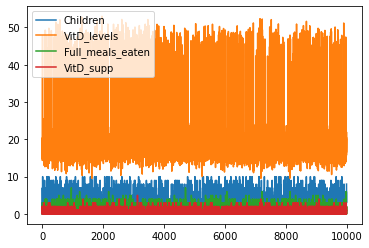

In [836]:
diabetes_median = df[z_score_cols].copy(deep=True)
mean_imputer = SimpleImputer(strategy='mean') 
diabetes_median.iloc[:, :] = mean_imputer.fit_transform(diabetes_median)
_ = diabetes_median.plot()

DF Mean Imputation


<AxesSubplot:title={'center':'Mean Imputation'}, xlabel='Full_meals_eaten', ylabel='Full_meals_eaten'>

DF Median Imputation


<AxesSubplot:title={'center':'Median Imputation'}, xlabel='Full_meals_eaten', ylabel='Full_meals_eaten'>

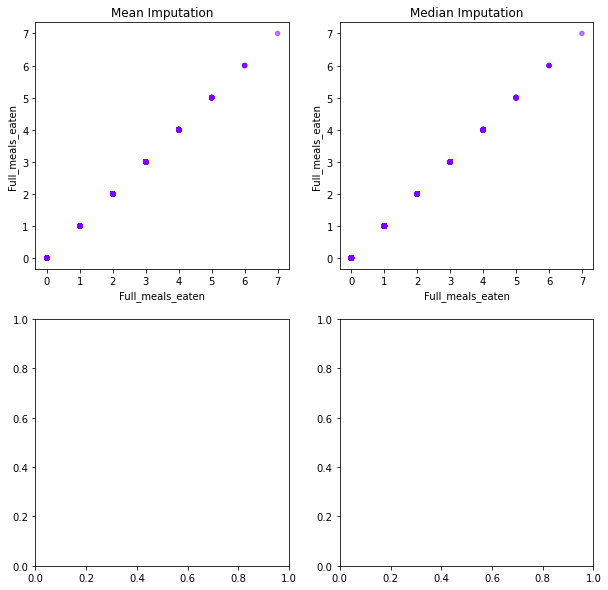

In [186]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median}

nullity = df['Full_meals_eaten'].isnull()
# +diabetes['Children'].isnull()

for ax, df_key in zip(axes.flatten(), imputations):
    print("DF", df_key)
    imputations[df_key].plot(x='Full_meals_eaten', y='Full_meals_eaten', kind='scatter',
        alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
        colorbar=False, title=df_key)

<AxesSubplot:title={'center':'Ozone'}>

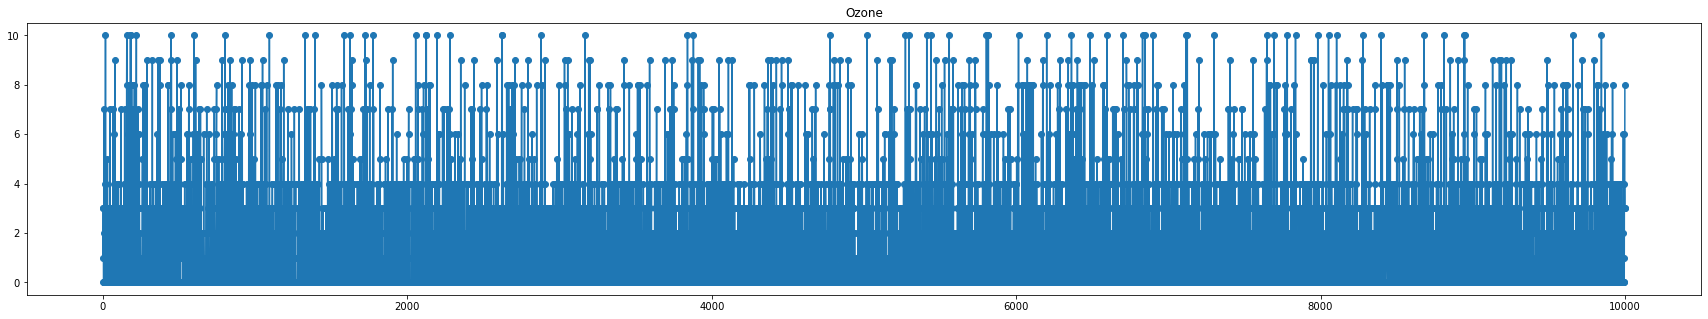

In [191]:
df['Children'].plot(title='Ozone', marker='o', figsize=(30, 5))

In [112]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[7]])

X = [[np.nan]]
print(imp_mean.transform(X))


imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mean.fit([[7]])

# Y = df["Children"].array.reshape(-1, 1)
z = imp_mean.fit_transform(df["Children"].array.reshape(-1, 1))
display(z)
z.unique()

SimpleImputer()

[[7.]]


array([[1.],
       [3.],
       [3.],
       ...,
       [3.],
       [3.],
       [8.]])

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

### Re-Expression Categories Treatment

### Other Data Cleaning Treatment

## D2: Justification of Mitigation Methods

## D3: Summary of the Outcomes

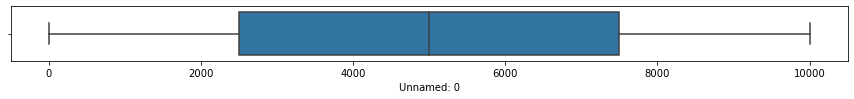

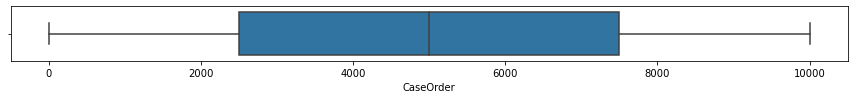

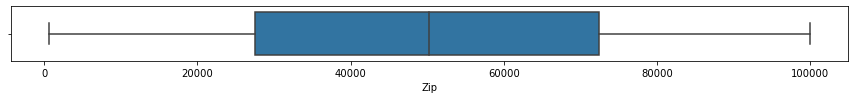

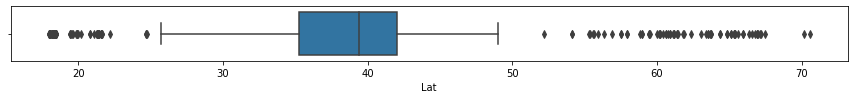

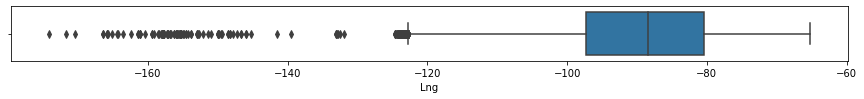

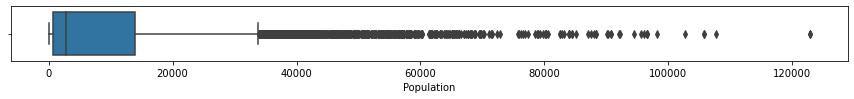

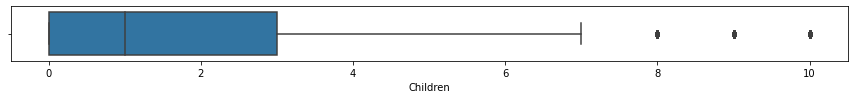

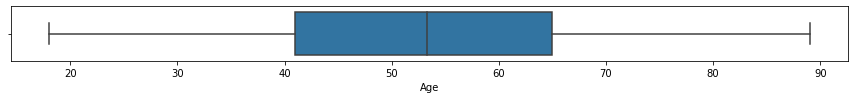

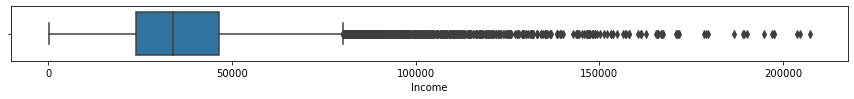

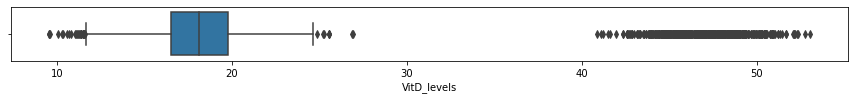

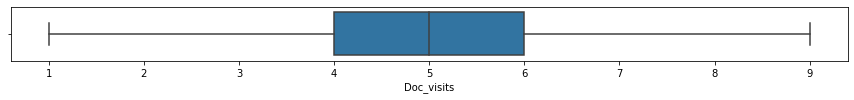

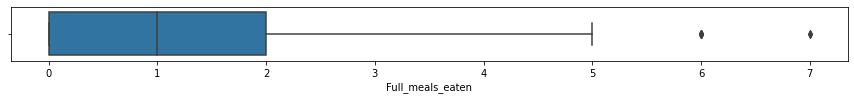

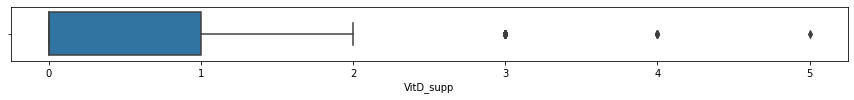

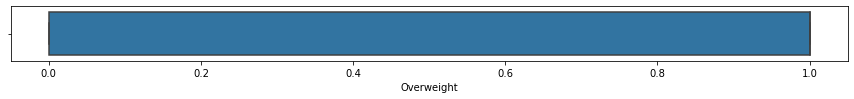

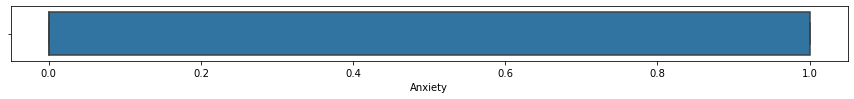

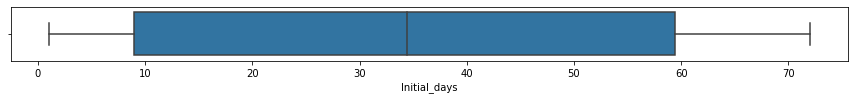

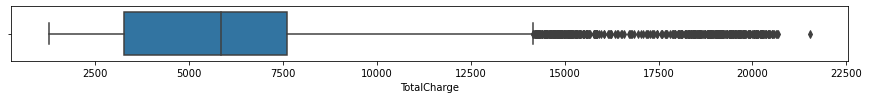

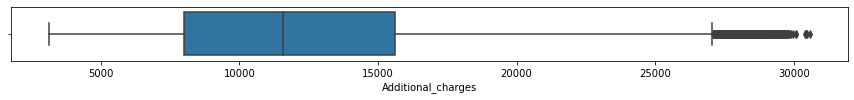

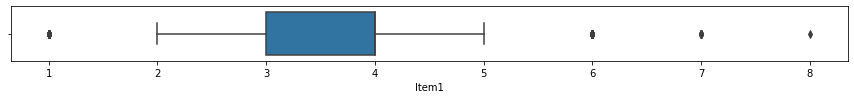

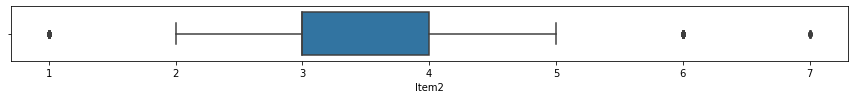

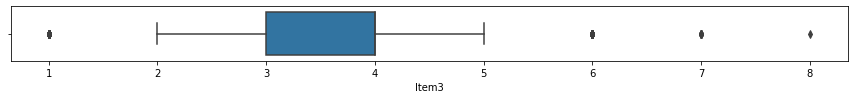

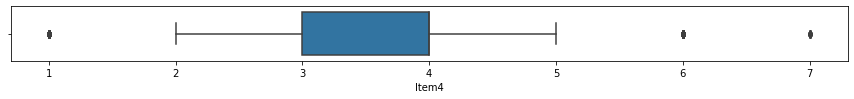

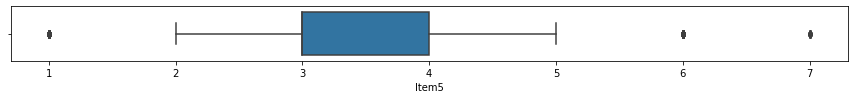

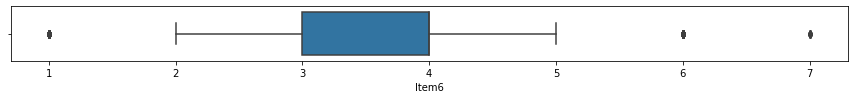

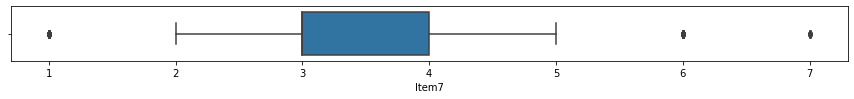

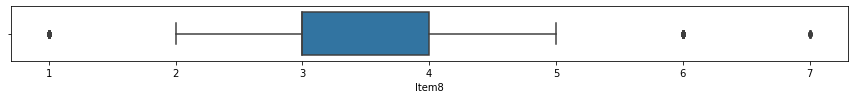

In [1099]:
create_boxplots(treated_df)

## D4: Mitigation Code 

## D5: Clean Data

## D6: Limitations

## D7: Impact of the Limitations

## E1. Principal Components

## E2. Criteria Used

## E3. Benefits

# Part IV. Supporting Documents
---

## F. Video

## G. Web Sources

- https://stackoverflow.com/q/47139203
- https://stackoverflow.com/a/57649212
- https://datascience.stackexchange.com/questions/60955/how-to-check-all-values-in-particular-column-has-same-data-type-or-not
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
- https://stackoverflow.com/questions/40339886/pandas-concat-generates-nan-values
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.htmlhttps://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
- https://stackoverflow.com/questions/43392588/how-to-increase-the-figure-size-of-dataframe-hist-for-pandas-0-11-0
- https://numpy.org/doc/stable/reference/generated/numpy.all.html
- https://stackoverflow.com/a/53585379
- https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
- https://stackoverflow.com/questions/43392588/how-to-increase-the-figure-size-of-dataframe-hist-for-pandas-0-11-0
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
- https://datatofish.com/check-nan-pandas-dataframe/
- https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

## H. Sources/References

In [ ]:
df['user_type'].astype('category')
df['user_type'].dtype == "category"

In [ ]:
df.Stroke.unique()

In [ ]:
df.corr()
# Create the correlation matrix
corr = df.corr()

# Draw the heatmap
sns.heatmap(corr, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

In [ ]:
plt.hist(df['Additional_charges'])
plt.title('Additional_charges')


In [833]:
# # Create statistics dictionary for aggregation function
# statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# # Group by ride_id and compute new statistics
# ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# # Find duplicated values again
# duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
# duplicated_rides = ride_unique[duplicates == True]

# # Assert duplicates are processed
# assert duplicated_rides.shape[0] == 0